# Heart Attack Risk Classification Project

<img src="heart2.png" alt="My Image" width="1000" height="400"/>

### Introduction

Heart disease is a serious issue, and predicting heart attacks early can be a lifesaver. Often, heart attacks occur suddenly and without clear warning, making it crucial to detect the risk before it’s too late. With today’s wealth of data and advanced technology, we have a unique chance to change how we predict and prevent heart attacks.

In this project, we're using machine learning to analyze complex health data and predict the likelihood of a heart attack. By looking at various health records, lifestyle habits, and medical measurements, we aim to build a model that can assess whether someone is at higher risk for a heart attack. 

In essence, this is a classification project that helps us to understand and predict heart attack risks based on medical data, aiming to make heart health management more proactive and effective.

### Problem Statement

The goal of this project is to develop a classification model that can predict the likelihood of a heart attack based on various patient health indicators. The dataset contains information on patients' demographic details, medical history, and diagnostic measures. The primary objective is to accurately classify patients into two categories: those with a higher likelihood of experiencing a heart attack (target = 1) and those with a lower likelihood (target = 0).

### Dataset

The dataset used for this analysis is the "Heart Failure Prediction Dataset" by Fedesoriano, available on Kaggle. The dataset is accessible at [this link](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

**Citation:**
Fedesoriano. (2021, September). *Heart failure prediction dataset*. Kaggle. Retrieved July 1, 2024, from https://www.kaggle.com/fedesoriano/heart-failure-prediction

* The dataset includes **918 observations** and **12 Features** in total.

In [1]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: Load Data

In [2]:
#load Data
file_path ='heart.csv'
data= pd.read_csv(file_path)
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
data.shape

(918, 12)

In [4]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Step 2: Feature Descriptions

**1. Age**
- *Description:* The patient's age in years(continuous).

- *Explanation:* Age is a critical factor in heart disease risk. Generally, the risk of heart disease increases with age. Older individuals are more likely to develop heart conditions compared to younger individuals.

In [5]:
data['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

**2. Sex**
- *Description:* The gender of the patient, where F indicates female and M indicates male (categorical).

- *Explanation:* Gender can influence the risk of heart disease. Men often have a higher risk of heart disease earlier in life compared to women. However, the risk for women increases and can become comparable to men after menopause.

In [6]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

**3. Chest Pain Type**

- *Description:* The type of chest pain experienced by the patient (categorical):
    - TA = Typical angina
    - ATA = Atypical angina
    - NAP = Non-anginal pain
    - ASY = Asymptomatic

- *Explanation:*
    - Typical Angina: Pain usually triggered by exertion or stress and relieved by rest. It often indicates a significant risk of heart disease.
    - Atypical Angina: Pain that is not typical of angina, which can also be a sign of heart disease but may be less straightforward.
    - Non-Anginal Pain: Pain that doesn’t fit the typical angina profile and might not be related to heart disease.
    - Asymptomatic: No pain or symptoms, which can sometimes make heart disease harder to detect.

In [7]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

**4. Resting Blood Pressure**

- *Description:* The patient's blood pressure while at rest, measured in millimeters of mercury (mm Hg)(continuous).

- *Explanation:* Blood pressure is a key indicator of heart health. High resting blood pressure can indicate hypertension, which is a major risk factor for heart disease and stroke.

In [8]:
data['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

**5. Cholesterol Level**
- *Description:* The amount of cholesterol in the blood, measured in milligrams per deciliter (mg/dl)(continuous).

- *Explanation:* High cholesterol levels can lead to the buildup of plaque in the arteries, increasing the risk of heart disease. Cholesterol levels are crucial for assessing cardiovascular risk.

In [9]:
data['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

**6. Fasting Blood Sugar**

- *Description:* Whether the fasting blood sugar level is greater than 120 mg/dl(categorical)
    - 0 = False (below 120 mg/dl)
    - 1 = True (120 mg/dl or above)
    
- *Explanation:* Elevated fasting blood sugar levels can indicate diabetes or prediabetes, which significantly increases the risk of heart disease.

In [10]:
data['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

**7. Resting Electrocardiographic Results**

- *Description:* Results from an electrocardiogram (ECG) at rest(categorical)
    - Normal = Normal
    - ST = ST-T wave abnormality
    - LVH = Left ventricular hypertrophy

- *Explanation:*
    - Normal: No apparent abnormalities in heart function.
    - ST-T Wave Abnormality: May indicate heart disease or other issues.
    - LVH: Thickening of the heart's left ventricle, often a sign of long-term high blood pressure or other heart conditions.

In [11]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

**8. Maximum Heart Rate Achieved**

- *Description:* The highest heart rate the patient reached during exercise or stress testing (continuous).

- *Explanation:* A high maximum heart rate is generally a positive indicator of cardiovascular fitness. A lower maximum heart rate during exercise might indicate heart problems.



In [12]:
data['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

**9. Exercise-Induced Angina**

- *Description:* Whether the patient experiences angina (chest pain) during exercise (catagorical)
    - N = No
    - Y = Yes
- *Explanation:* Exercise-induced angina suggests that the heart is not getting enough oxygen during physical exertion, which can be a sign of coronary artery disease.

In [13]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

**10. ST Depression Induced by Exercise (oldpeak)**

- *Description:* The depression of the ST segment of the ECG during exercise compared to rest (continuous).

- *Explanation:* ST segment depression during exercise can be an indicator of ischemia, where the heart muscle isn’t receiving enough oxygen-rich blood.

In [14]:
data['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

**11. Slope of the Peak Exercise ST Segment**
- *Description:* The slope of the ST segment at peak exercise (categorical)
    - Up = Upsloping
    - Flat = Flat
    - Down = Downsloping

- *Explanation:*
    - Upsloping: Typically not associated with heart disease.
    - Flat: Can be a sign of heart disease, especially if it occurs during exercise.
    - Downsloping: Often associated with significant heart disease.

In [15]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

**12. Heart Disease Status (target)**

- *Description:* Whether the patient has heart disease (Binary)
    - 0 = Normal
    - 1 = Heart Disease

- *Explanation:* This is the outcome variable indicating whether the patient is diagnosed with heart disease, which is the primary focus of prediction in this project

In [16]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

### Step 3: Basic Checks to Understand the Data Better 

In [17]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [18]:
data.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Inference**: 
* Number of records : The dataset consists of 918 records, ranging from 0 to 917.

* Columns : there are  12 columns in total including target column.

In [20]:
#numerical columns
num_data=data.select_dtypes(include=['int64','float64'])
num_data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [21]:
#categorical columns
cat_data= data.select_dtypes(include=['object'])
cat_data.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [22]:
#unique values
for x in cat_data:
  print(x)
  print("unique_values",data[x].unique())
  print("value_count",data[x].value_counts())
  print('--------------------------')

Sex
unique_values ['M' 'F']
value_count Sex
M    725
F    193
Name: count, dtype: int64
--------------------------
ChestPainType
unique_values ['ATA' 'NAP' 'ASY' 'TA']
value_count ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
--------------------------
RestingECG
unique_values ['Normal' 'ST' 'LVH']
value_count RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
--------------------------
ExerciseAngina
unique_values ['N' 'Y']
value_count ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
--------------------------
ST_Slope
unique_values ['Up' 'Flat' 'Down']
value_count ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
--------------------------


In [23]:
#statistical report for numercial data
data.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

**Inference:**

**1. Age**
- The average age is approximately 53.5 years, with most patients being middle-aged (47 to 60 years).

**2. Resting Blood Pressure (RestingBP)**
- The average resting blood pressure is 132.4 mm Hg, but the dataset contains some potential errors, such as a minimum value of 0.

**3. Cholesterol**
- The average cholesterol level is 198.8 mg/dL, with a wide range indicating high variability. The minimum value of 0 suggests possible data entry errors.

**4. Fasting Blood Sugar (FastingBS)**
- About 23.3% of patients have fasting blood sugar levels indicating potential diabetes or prediabetes.

**5. Maximum Heart Rate Achieved (MaxHR)**
- The average maximum heart rate during exercise is 136.8 bpm, with a broad range from 60 to 202 bpm.

**6. Oldpeak**
- The average ST depression is 0.887, with most values indicating mild to moderate ischemia during exercise.

**7. Heart Disease (HeartDisease)**
- 55.3% of patients in the dataset have been diagnosed with heart disease, indicating a slight imbalance in the dataset towards positive cases.


In [24]:
#statistical report for categorical data
data.describe(include='object').T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

**Inference:**

**1. Sex**
- The majority of the patients are male, with 725 out of 918 (approximately 79%).

**2. Chest Pain Type (ChestPainType)**
- The most common chest pain type is Asymptomatic (ASY), with 496 occurrences (54%).

**3. Resting Electrocardiographic Results (RestingECG)**
- The most frequent result is 'Normal', appearing in 552 patients (60%).

**4. Exercise-Induced Angina (ExerciseAngina)**
- The majority of patients did not experience exercise-induced angina, with 547 out of 918 (approximately 60%).

**5. ST Segment Slope (ST_Slope)**
- The most common slope is 'Flat', observed in 460 patients (50%).

### Step 4 : Data Cleaning 

#### 4.1. Check for Missing Values and Handle them

In [25]:
#check for missing values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Inference**
- It is clear that dataset has no missing values across all features.

#### 4.2. Check for Duplicates and Handle them

In [26]:
data.duplicated().sum()

0

**Inference:**
- There are no duplicate rows.

#### 4.3. Check for Outliers and Handle them

- Outliers are extreme values that can mislead data analysis and lead to inaccurate predictions.

- They are identified using visual tools like box plots, which highlight deviations in numerical data.

- Addressing outliers is crucial to ensure reliable and accurate model outcomes.


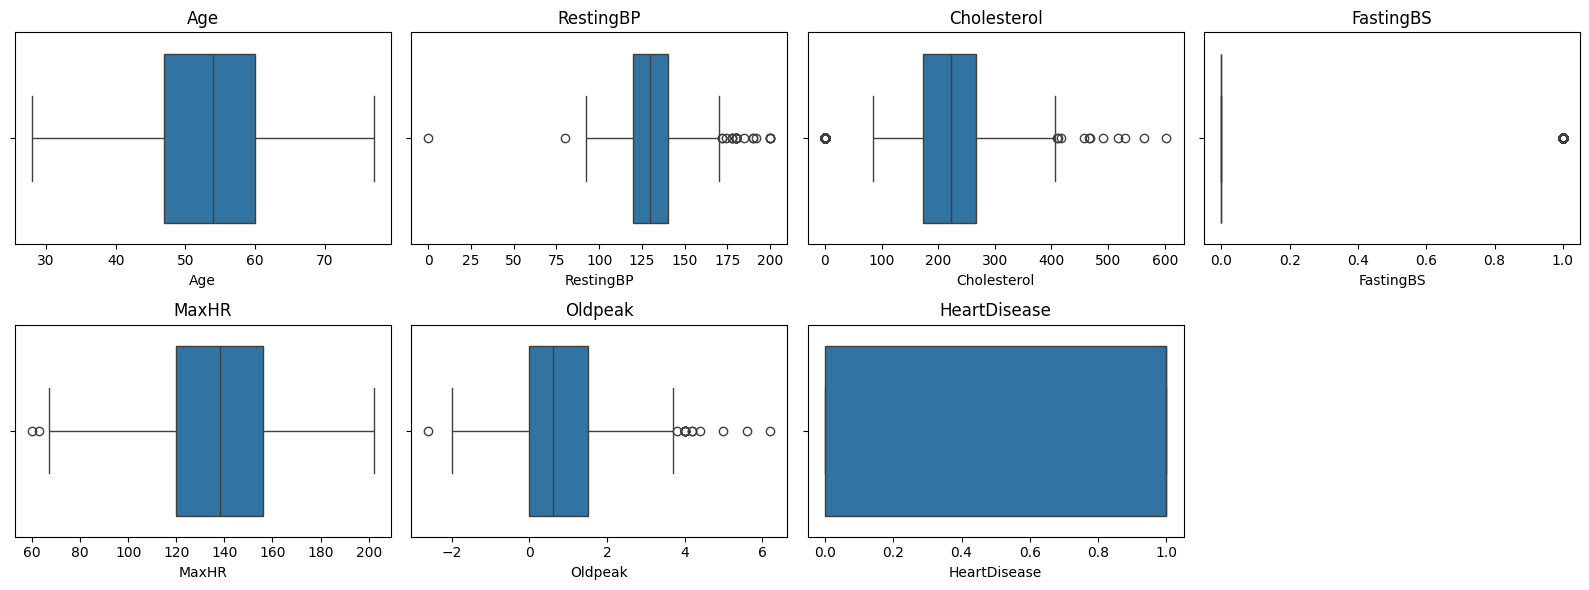

In [27]:
#setup the seaborn figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

# Plotting box plots for each feature
sns.boxplot(data=data, x='Age', ax=axes[0, 0])
axes[0, 0].set_title("Age")
sns.boxplot(data=data, x='RestingBP', ax=axes[0, 1])
axes[0, 1].set_title("RestingBP")
sns.boxplot(data=data, x='Cholesterol', ax=axes[0, 2])
axes[0, 2].set_title("Cholesterol")
sns.boxplot(data=data, x='FastingBS', ax=axes[0, 3])
axes[0, 3].set_title("FastingBS")
sns.boxplot(data=data, x='MaxHR', ax=axes[1, 0])
axes[1, 0].set_title("MaxHR")
sns.boxplot(data=data, x='Oldpeak', ax=axes[1, 1])
axes[1, 1].set_title("Oldpeak")
sns.boxplot(data=data, x='HeartDisease', ax=axes[1, 2])
axes[1, 2].set_title("HeartDisease")
fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

**Inference:**
- We notice that features like RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak features have some outliers.

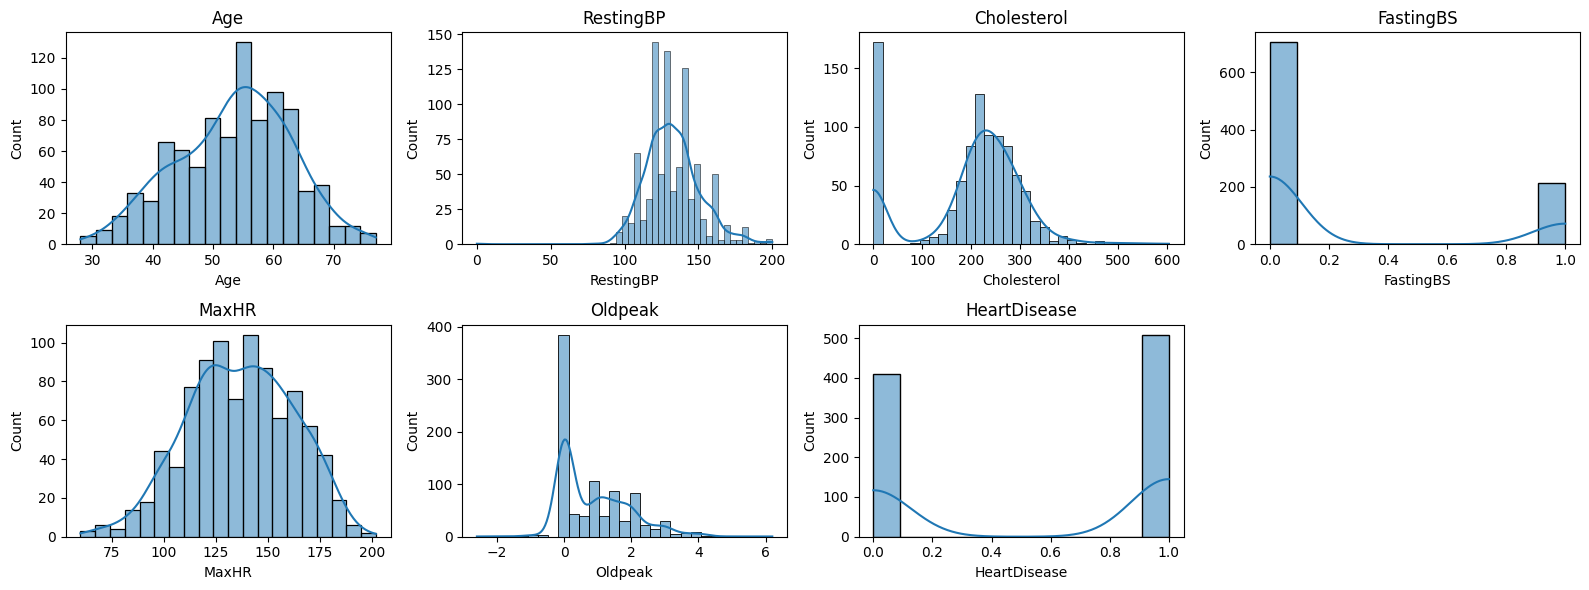

In [28]:
#use histogram plot to know the distribution
#setup the seaborn figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

sns.histplot(data=data, x='Age', ax=axes[0, 0],kde=True)
axes[0, 0].set_title("Age")
sns.histplot(data=data, x='RestingBP', ax=axes[0, 1],kde=True)
axes[0, 1].set_title("RestingBP")
sns.histplot(data=data, x='Cholesterol', ax=axes[0, 2],kde=True)
axes[0, 2].set_title("Cholesterol")
sns.histplot(data=data, x='FastingBS', ax=axes[0, 3],kde=True)
axes[0, 3].set_title("FastingBS")
sns.histplot(data=data, x='MaxHR', ax=axes[1, 0],kde=True)
axes[1, 0].set_title("MaxHR")
sns.histplot(data=data, x='Oldpeak', ax=axes[1, 1],kde=True)
axes[1, 1].set_title("Oldpeak")
sns.histplot(data=data, x='HeartDisease', ax=axes[1, 2],kde=True)
axes[1, 2].set_title("HeartDisease")
fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

**Inference:**
- **Age** : The Age histogram shows a fairly normal distribution centered around the 50s to 60s, which is common in datasets related to heart disease.

- **RestingBP** : The distribution is skewed to the right with a peak around 120-130. There is a small tail towards higher values.

- **Cholesterol** :  The distribution is roughly normal, but there is a spike at the lower end (around 0-100), possibly due to missing data coded as zero.

- **FastingBS** : This is a bimodal distribution, reflecting the binary nature of the variable (likely 0 = normal, 1 = high).

- **MaxHR** : The distribution is normal, centered around 140-160, with a slight skew towards lower values.

- **Oldpeak** :  This is heavily right-skewed, with most values clustered around 0 and a long tail towards higher values.

- **HeartDisease** : This is a binary distribution, likely representing the presence (1) or absence (0) of heart disease.

**How to find Outliers ?**
+ 3 sigma rule 
+ IQR

**3- Sigma Rule**
- It is used when the data is normal distribution.
- low_limit = mean - 3 * std
- upper_limit = mean + 3 * std
- Outliers are the values which are greater than the upper limit and smaller than the lower limit.

In [29]:
#clearly Age shows normal distributions so we use 3-sigma rule to identify outliers
lower_limit = data['Age'].mean() - 3 * data['Age']. std()
upper_limit = data['Age'].mean() + 3 * data['Age']. std()
print('lower limit',lower_limit)
print('upper limit',upper_limit)

lower limit 25.213043725991334
upper limit 81.8087427663834


In [30]:
#what values are less than lower limit and greater than upper limit
data[(data['Age']< lower_limit) |(data['Age']> upper_limit)]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

**Inference:**
- 0 outliers found in Age. 

In [31]:
#clearly Cholesterol  shows normal distributions so we use 3-sigma rule to identify outliers
lower_limit = data['Cholesterol'].mean() - 3 * data['Cholesterol']. std()
upper_limit = data['Cholesterol'].mean() + 3 * data['Cholesterol']. std()
print('lower limit',lower_limit)
print('upper limit',upper_limit)

lower limit -129.35286938645797
upper limit 526.9519979267629


In [32]:
#what values are less than lower limit and greater than upper limit
data[(data['Cholesterol']< lower_limit) |(data['Cholesterol']> upper_limit)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
76    32   M           ASY        118          529          0     Normal   
149   54   M           ASY        130          603          1     Normal   
616   67   F           NAP        115          564          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
76     130              N      0.0     Flat             1  
149    125              Y      1.0     Flat             1  
616    160              N      1.6     Flat             0

**Inference:**
- There are 3 outliers in the Cholesterol column 

**How to Handle Outliers ?**
- Outliers are handled only if % of outliers are less than 5%.
- when data is normal (3-sigma rule) replace with mean.
 

In [33]:
#find % of outliers in Cholesterol
len(data[(data['Cholesterol']< lower_limit) |(data['Cholesterol']> upper_limit) ])/len(data) *100

0.32679738562091504

In [34]:
#we have 0.33 % outliers which is less than 5 %, so replace outliers with mean
data.loc[(data['Cholesterol']< lower_limit) |(data['Cholesterol']> upper_limit),'Cholesterol'] = data['Cholesterol'].mean()

In [35]:
data[(data['Cholesterol']< lower_limit) |(data['Cholesterol']> upper_limit)]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [36]:
#clearly MaxHR shows normal distributions so we use 3-sigma rule to identify outliers
lower_limit = data['MaxHR'].mean() - 3 * data['MaxHR']. std()
upper_limit = data['MaxHR'].mean() + 3 * data['MaxHR']. std()
print('lower limit',lower_limit)
print('upper limit',upper_limit)

lower limit 60.428365776970224
upper limit 213.19037060647202


In [37]:
#what values are less than lower limit and greater than upper limit
data[(data['MaxHR']< lower_limit) |(data['MaxHR']> upper_limit)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
390   51   M           ASY        140          0.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
390     60              N      0.0     Flat             1

**Inference:**
- There is only 1 outlier in MAXHR

In [38]:
#find % of outliers in MaxHR
len(data[(data['MaxHR']< lower_limit) |(data['MaxHR']> upper_limit) ])/len(data) *100

0.10893246187363835

In [39]:
#we have 0.11 % outliers which is less than 5 %, so replace outliers with mean
data.loc[(data['MaxHR']< lower_limit) |(data['MaxHR']> upper_limit),'MaxHR'] = data['MaxHR'].mean()

In [40]:
data[(data['MaxHR']< lower_limit) |(data['MaxHR']> upper_limit)]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

**IQR Method**
- If the data is skewed we use IQR method (Inter Quartile Range).
- low_limit = Q1 - 1.5 * IQR
- upper_limit = Q3 + 1.5 * IQR
    - Q1 = lower Quartile 
    - Q3 = Upper Quartile 
- IQR = Q3 - Q1

In [41]:
# RestingBP distribution is right skewed so will use IQR method
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
print("lower quartile(Q1)",Q1)
print("upper quartile(Q3)",Q3)
print("IQR",IQR)

lower quartile(Q1) 120.0
upper quartile(Q3) 140.0
IQR 20.0


In [42]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit', lower_limit)
print('upper limit', upper_limit)

lower limit 90.0
upper limit 170.0


In [43]:
data[(data['RestingBP']< lower_limit) | (data['RestingBP']> upper_limit)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190        241.0          0     Normal   
123   58   F           ATA        180        393.0          0     Normal   
189   53   M           ASY        180        285.0          0         ST   
190   46   M           ASY        180        280.0          0         ST   
241   54   M           ASY        200        198.0          0     Normal   
274   45   F           ATA        180        295.0          0     Normal   
275   59   M           NAP        180        213.0          0     Normal   
278   57   F           ASY        180        347.0          0         ST   
314   53   M           ASY         80          0.0          0     Normal   
365   64   F           ASY        200          0.0          0     Normal   
372   63   M           ASY        185          0.0          0     Normal   
399   61   M           NAP        200          0.0          1         ST   
411   54   M           ASY        180          0.0          1     Normal   
423   60   M           NAP        180          0.0          0         ST   
449   55   M           NAP          0          0.0          0     Normal   
475   59   M           ASY        178          0.0          1        LVH   
550   55   M           ASY        172        260.0          0     Normal   
585   57   M           ATA        180        285.0          1         ST   
592   61   M           ASY        190        287.0          1        LVH   
673   59   F           ASY        174        249.0          0     Normal   
702   59   M            TA        178        270.0          0        LVH   
725   55   F           ASY        180        327.0          0         ST   
732   56   F           ASY        200        288.0          1        LVH   
759   54   M           ATA        192        283.0          0        LVH   
774   66   F           ASY        178        228.0          1     Normal   
780   64   F           ASY        180        325.0          0     Normal   
855   68   M           NAP        180        274.0          1        LVH   
880   52   M           NAP        172        199.0          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
109  106.0              N      0.0       Up             0  
123  110.0              Y      1.0     Flat             1  
189  120.0              Y      1.5     Flat             1  
190  120.0              N      0.0       Up             0  
241  142.0              Y      2.0     Flat             1  
274  180.0              N      0.0       Up             0  
275  100.0              N      0.0       Up             0  
278  126.0              Y      0.8     Flat             0  
314  141.0              Y      2.0     Down             0  
365  140.0              Y      1.0     Flat             1  
372   98.0              Y      0.0       Up             1  
399   70.0              N      0.0     Flat             1  
411  150.0              N      1.5     Flat             1  
423  140.0              Y      1.5     Flat             0  
449  155.0              N      1.5     Flat             1  
475  120.0              Y      0.0     Flat             1  
550   73.0              N      2.0     Flat             1  
585  120.0              N      0.8     Flat             1  
592  150.0              Y      2.0     Down             1  
673  143.0              Y      0.0     Flat             1  
702  145.0              N      4.2     Down             0  
725  117.0              Y      3.4     Flat             1  
732  133.0              Y      4.0     Down             1  
759  195.0              N      0.0       Up             1  
774  165.0              Y      1.0     Flat             1  
780  154.0              Y      0.0       Up             0  
855  150.0              Y      1.6     Flat             1  
880  162.0              N      0.5       Up             0

In [44]:
len(data[(data['RestingBP']< lower_limit) | (data['RestingBP']> upper_limit)])/ len(data)*100

3.0501089324618738

**Inference:** 
- The outlier percentage is 3%, which is below the 5% threshold. Since such measurements are possible in real life, it’s not advisable to remove or replace them with the mean.

In [45]:
# Oldpeak distribution is right skewed so will use IQR method
Q1 = data['Oldpeak'].quantile(0.25)
Q3 = data['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
print("lower quartile(Q1)",Q1)
print("upper quartile(Q3)",Q3)
print("IQR",IQR)

lower quartile(Q1) 0.0
upper quartile(Q3) 1.5
IQR 1.5


In [46]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit', lower_limit)
print('upper limit', upper_limit)

lower limit -2.25
upper limit 3.75


In [47]:
data[(data['Oldpeak']< lower_limit) | (data['Oldpeak']> upper_limit)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
68    52   M           ASY        160        246.0          0         ST   
166   50   M           ASY        140        231.0          0         ST   
324   46   M           ASY        100          0.0          1         ST   
500   65   M           ASY        136        248.0          0     Normal   
521   61   M           ASY        120        282.0          0         ST   
537   74   M           ASY        150        258.0          1         ST   
559   64   M           ASY        134        273.0          0     Normal   
624   63   F           ASY        150        407.0          0        LVH   
702   59   M            TA        178        270.0          0        LVH   
732   56   F           ASY        200        288.0          1        LVH   
771   55   M           ASY        140        217.0          0     Normal   
775   38   M            TA        120        231.0          0     Normal   
791   51   M           ASY        140        298.0          0     Normal   
850   62   F           ASY        160        164.0          0        LVH   
900   58   M           ASY        114        318.0          0         ST   
908   63   M           ASY        140        187.0          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
68    82.0              Y      4.0     Flat             1  
166  140.0              Y      5.0     Flat             1  
324  133.0              N     -2.6     Flat             1  
500  140.0              Y      4.0     Down             1  
521  135.0              Y      4.0     Down             1  
537  130.0              Y      4.0     Down             1  
559  102.0              Y      4.0     Down             1  
624  154.0              N      4.0     Flat             1  
702  145.0              N      4.2     Down             0  
732  133.0              Y      4.0     Down             1  
771  111.0              Y      5.6     Down             1  
775  182.0              Y      3.8     Flat             1  
791  122.0              Y      4.2     Flat             1  
850  145.0              N      6.2     Down             1  
900  140.0              N      4.4     Down             1  
908  144.0              Y      4.0       Up             1

In [48]:
len(data[(data['Oldpeak']< lower_limit) | (data['Oldpeak']> upper_limit)])/ len(data)*100

1.7429193899782136

In [49]:
#we have 1.7 % outliers which is less than 5 %, so replace outliers with mean
data.loc[(data['Oldpeak']< lower_limit) |(data['Oldpeak']> upper_limit),'Oldpeak'] = data['Oldpeak'].mean()

In [50]:
data[(data['Oldpeak']< lower_limit) | (data['Oldpeak']> upper_limit)]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

### Step 5 : Exploratory Data Analysis (EDA) 

 **1. Univarite : It focuses on understanding the distribution and characteristics of a single variable** 
- Histograms: Displays the frequency distribution of numerical data.
- Box plots: Summarizes the distribution of numerical data, highlighting outliers.
- Count plot : to find unique value.

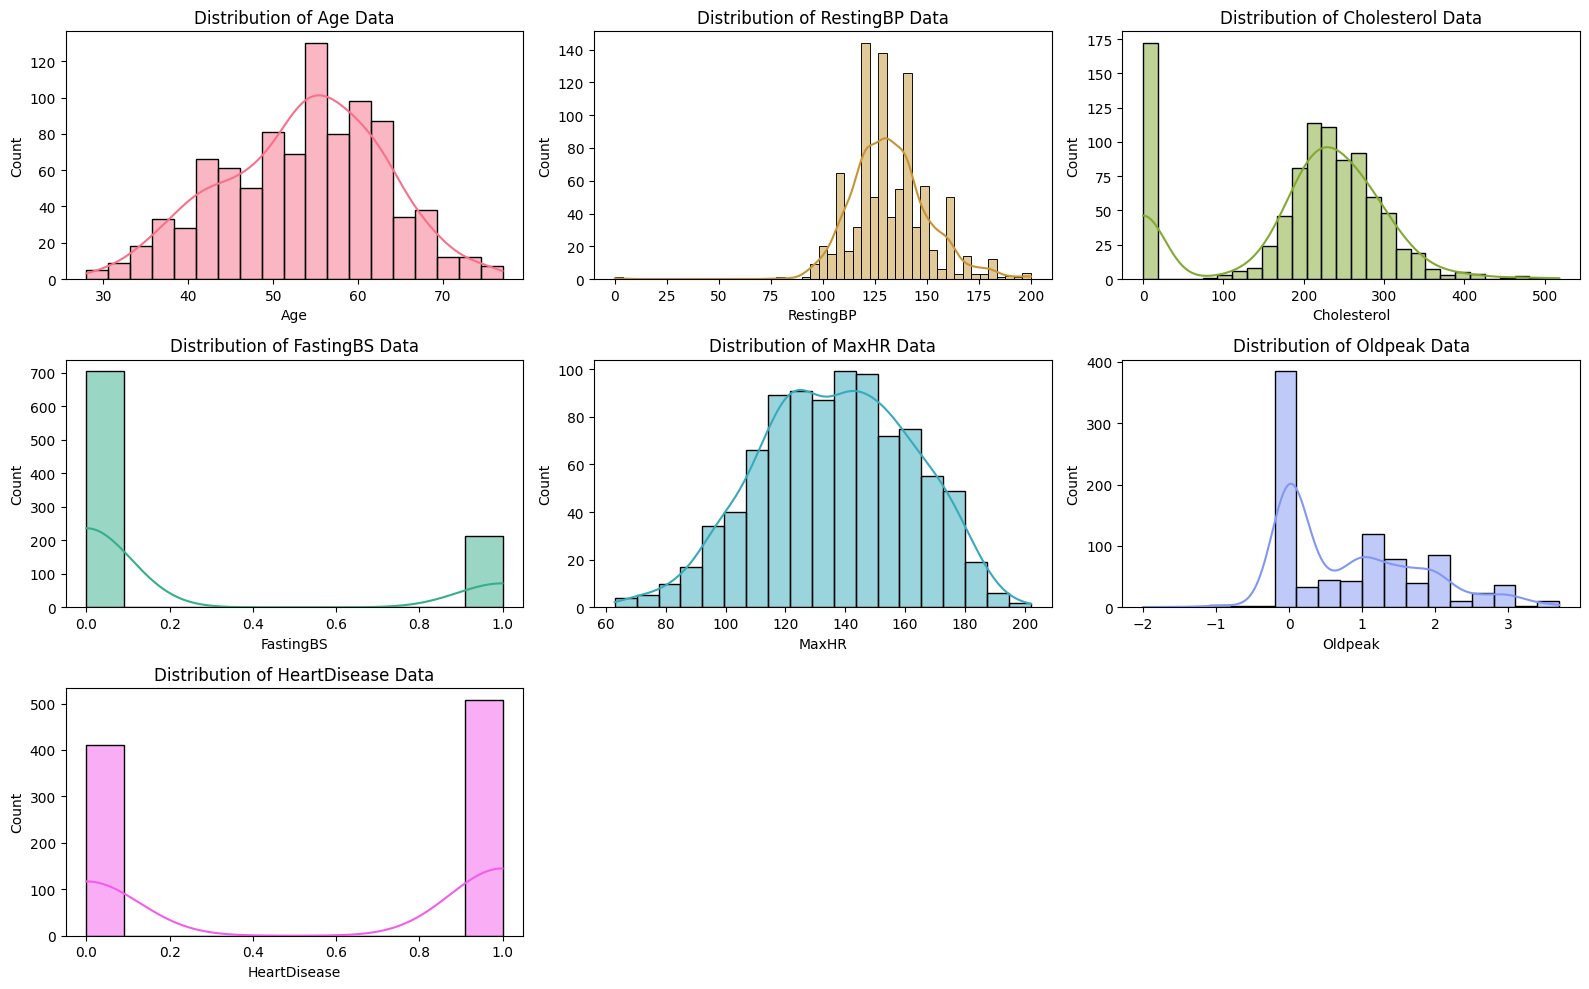

In [51]:
# use histogram plot to know the distribution

# Filter out only numerical columns
num_data = data.select_dtypes(include=['number'])

# Define a list of colors to use for the histograms
colors = sns.color_palette("husl", len(num_data.columns))

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_data.columns, 1):
    plt.subplot(3, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(num_data[col], kde=True, color=colors[i-1])
    plt.tight_layout()
plt.show()

**Inference:**
- Age, Cholesterol and MaxHR has normal distribution of data.
- FastingBS and HeartDisease has binary distribution with 0 and 1.
- RestingBP and Oldpeak has right skewed distribution of data.

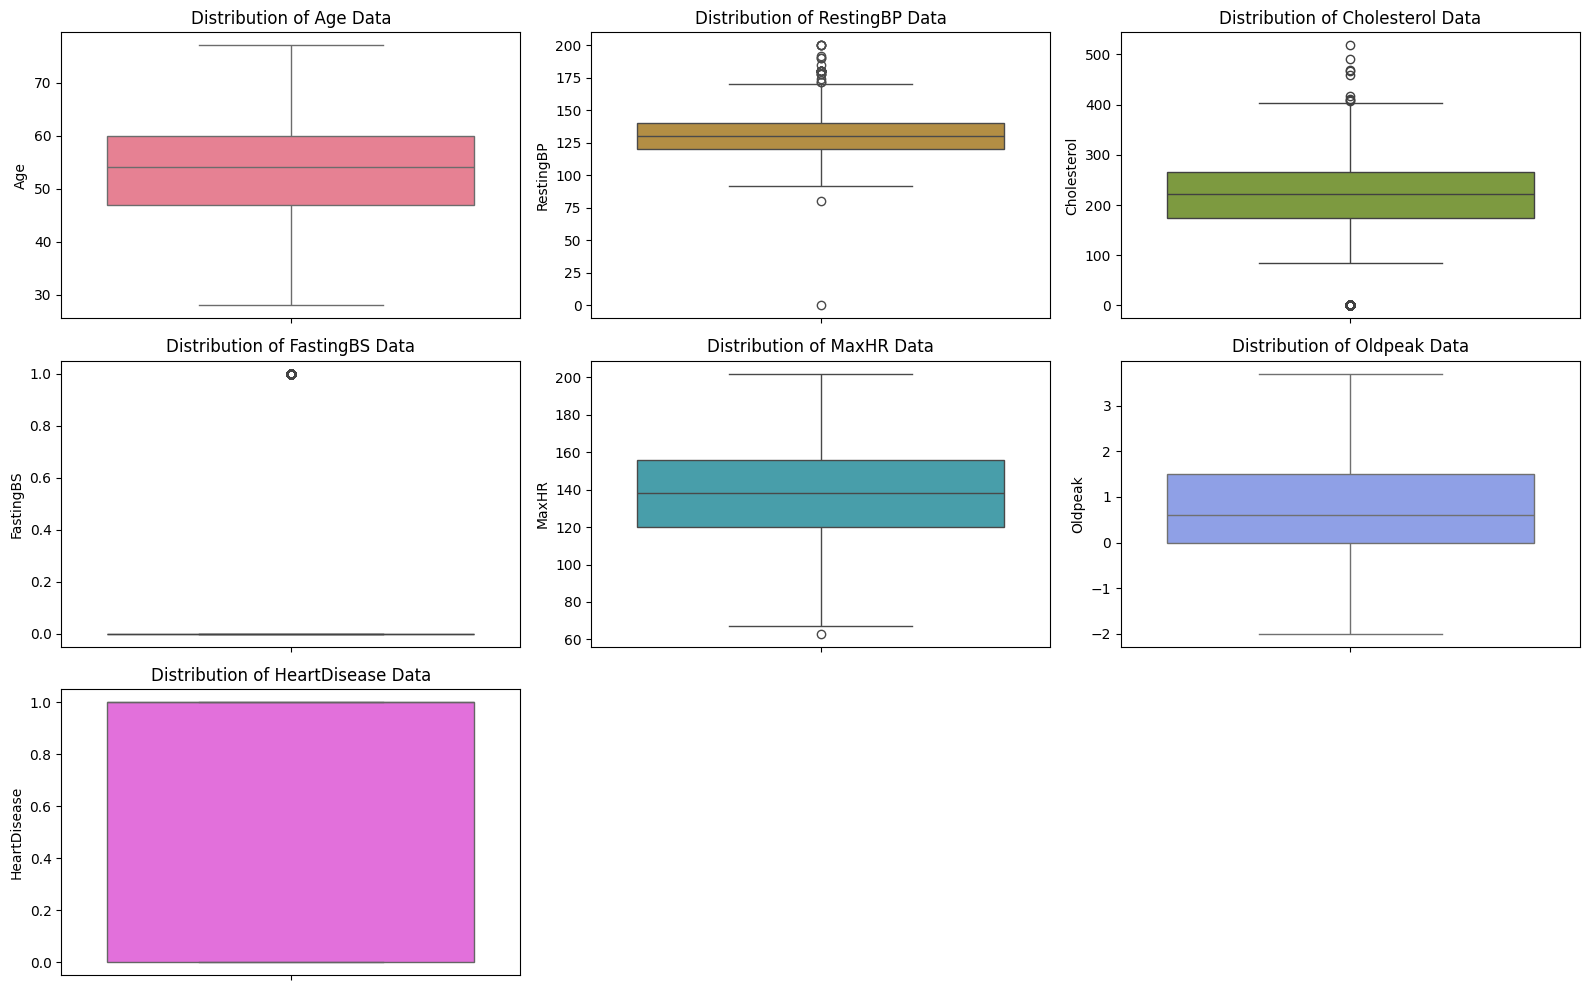

In [52]:
# use Box plot to know the outliers

# Filter out only numerical columns
num_data = data.select_dtypes(include=['number'])

# Define a list of colors to use for the histograms
colors = sns.color_palette("husl", len(num_data.columns))

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_data.columns, 1):
    plt.subplot(3, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(num_data[col], color=colors[i-1])
    plt.tight_layout()
plt.show()

**Inference:**
- Outliers are seen in RestingBP and Cholesterol.

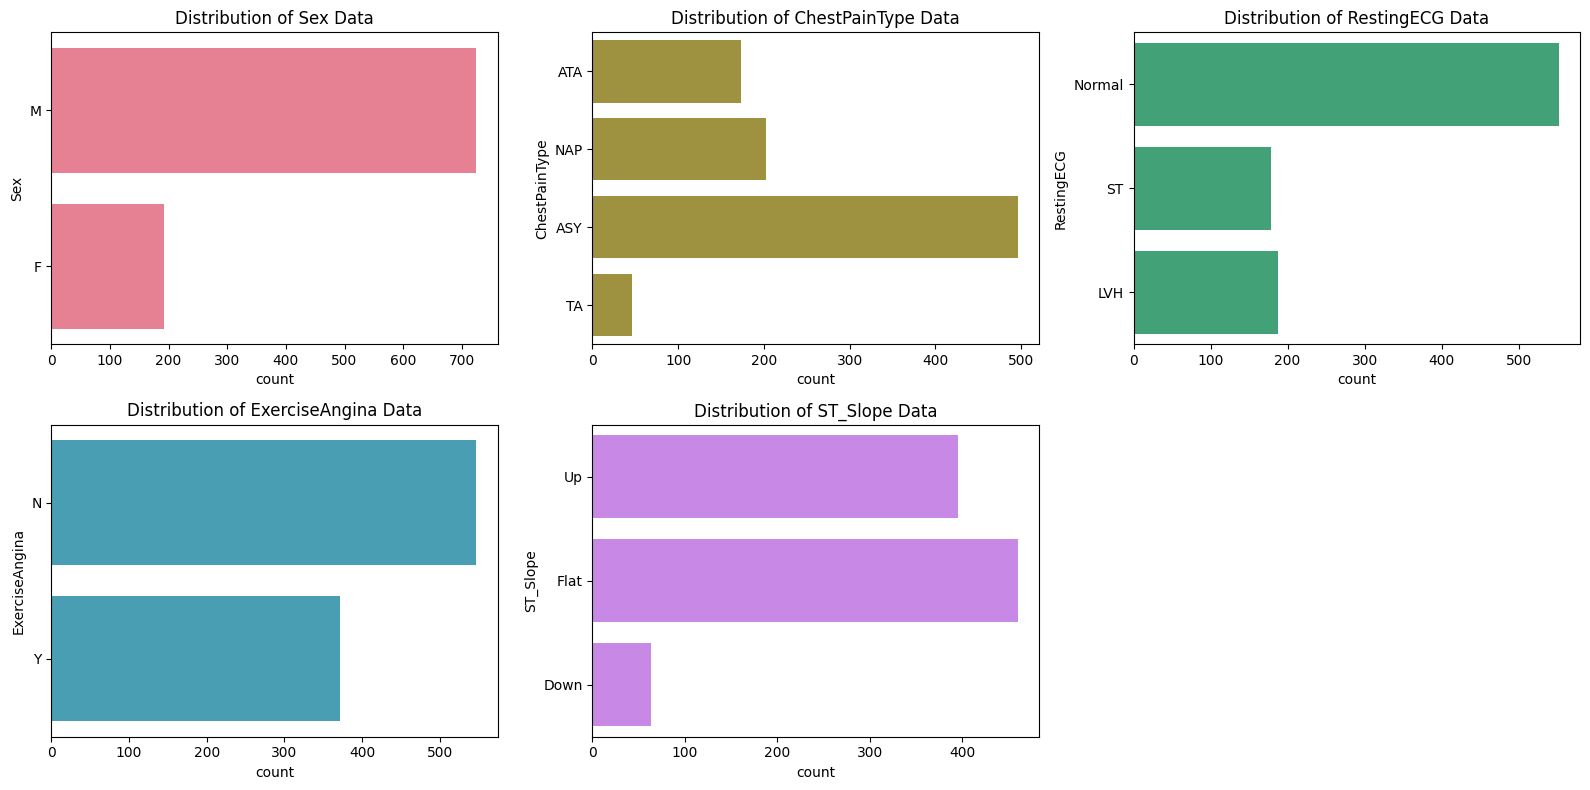

In [53]:
#use Count plot to know the unique values

# Filter out only categorical columns
cat_data = data.select_dtypes(include=['object'])

# Define a list of colors
colors = sns.color_palette("husl", len(cat_data.columns))

plt.figure(figsize=(16, 8))
for i, col in enumerate(cat_data.columns, 1):
    plt.subplot(2, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.countplot(cat_data[col], color=colors[i-1])
    plt.tight_layout()
plt.show()

**Inference:**

1. **Sex Column: Male Majority**
   - The dataset has a higher proportion of males compared to females, which could impact the model's performance if not addressed.

2. **ChestPainType Column: Mostly Asymptomatic**
   - A large number of cases are classified as "Asymptomatic," which may limit the model's ability to learn from symptomatic cases.

3. **RestingECG Column: Predominantly Normal**
   - Most ECG readings are normal, potentially underrepresenting abnormal heart conditions in the dataset.

4. **ExerciseAngina Column: Mostly No Angina**
   - There are more "No" values for angina pain during exercise, which could bias the model towards predicting the absence of angina.

5. **ST_Slope Column: Mainly Flat**
   - The majority of data has a "Flat" ST slope, which might affect the model’s sensitivity to other ST slope variations associated with heart disease.

**2. Bivariate: It involves examining the relationship between two variables.**

- Scatter Plot: visualizes the relationship between two continuous variables.
- Bar Plot: compares numerical values across categories of a categorical variable.

**Numerical vs Numerical**

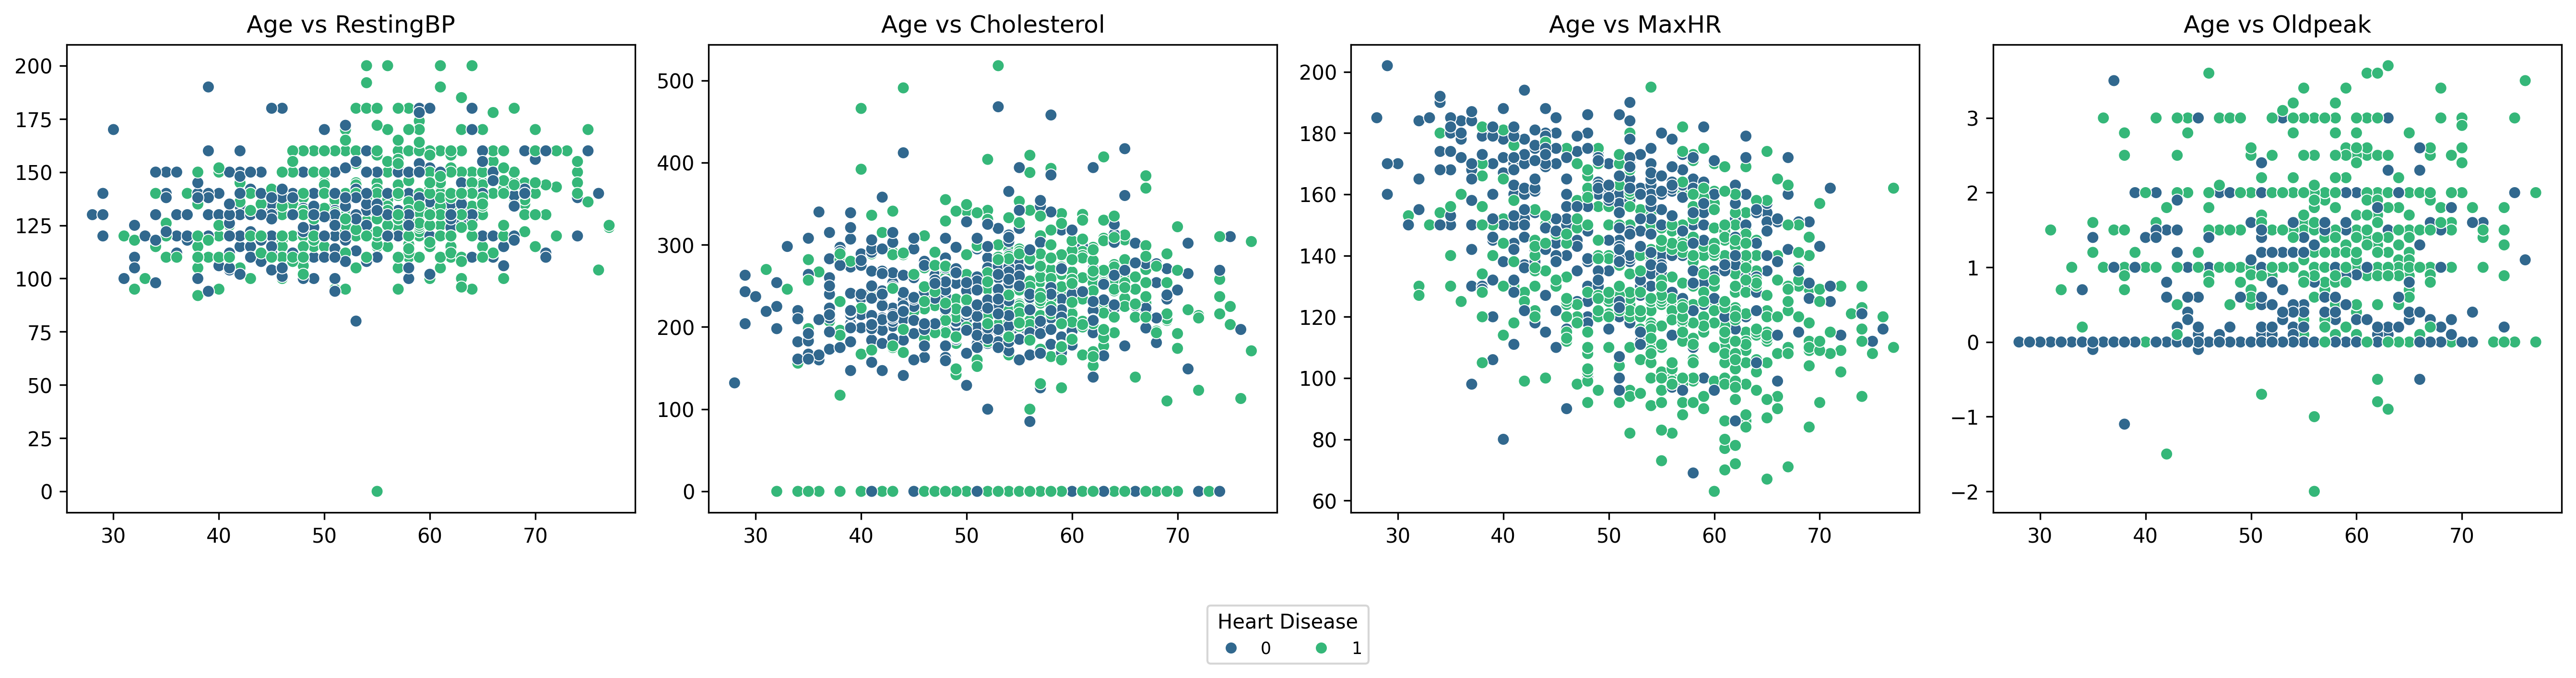

In [54]:
# List of numerical feature pairs
numerical_pairs = [
    ('Age', 'RestingBP'),
    ('Age', 'Cholesterol'),
    ('Age', 'MaxHR'),
    ('Age', 'Oldpeak')
]

# Set the figure size and resolution
plt.figure(figsize=(18, 4), dpi=300)

# Create a plot for each pair
for i, (x, y) in enumerate(numerical_pairs):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(data=data, x=x, y=y, hue='HeartDisease', palette='viridis')
    plt.title(f'{x} vs {y}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend().set_visible(False)  
    
# Adding a single legend outside the plots
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, title='Heart Disease', bbox_to_anchor=(0.5, -0.05), fontsize='small')
plt.tight_layout() 
plt.show()

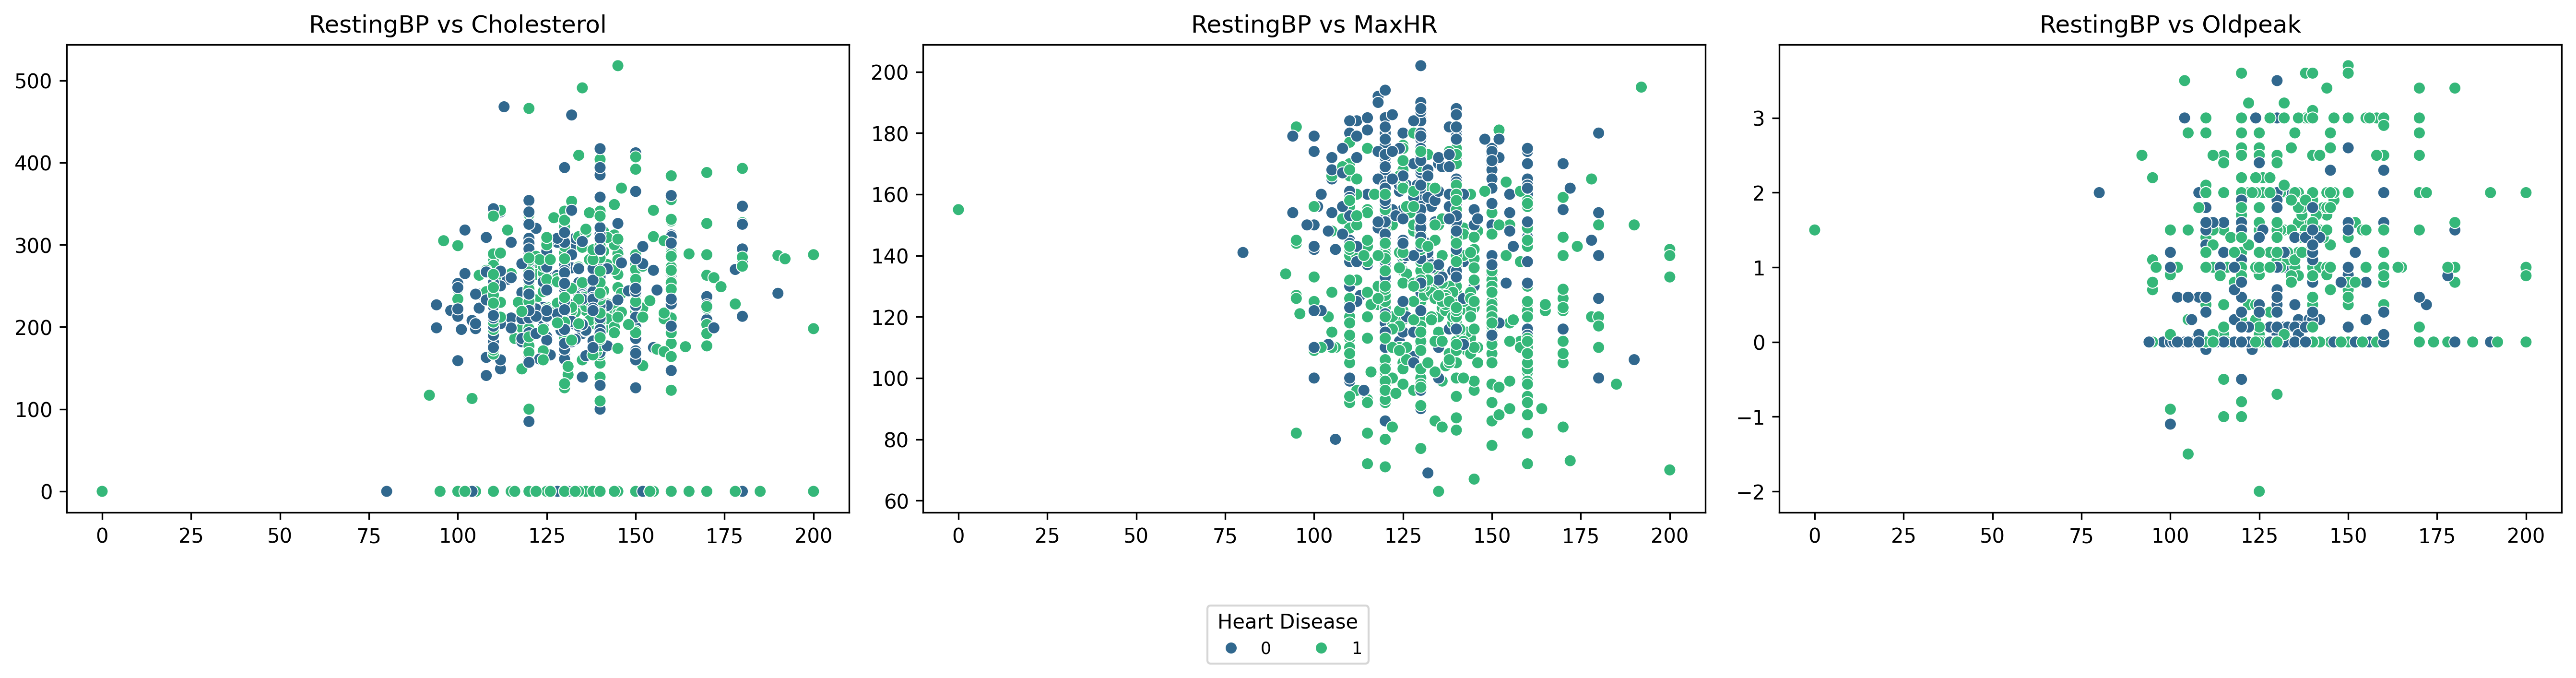

In [55]:
# List of numerical feature pairs
numerical_pairs = [
    ('RestingBP', 'Cholesterol'),
    ('RestingBP', 'MaxHR'),
    ('RestingBP', 'Oldpeak')
]

# Set the figure size and resolution
plt.figure(figsize=(18, 4), dpi=300)

# Create a plot for each pair
for i, (x, y) in enumerate(numerical_pairs):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=data, x=x, y=y, hue='HeartDisease', palette='viridis')
    plt.title(f'{x} vs {y}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend().set_visible(False)  
    
# Add a single legend outside the plots
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, title='Heart Disease', bbox_to_anchor=(0.5, -0.05), fontsize='small')
plt.tight_layout() 
plt.show()

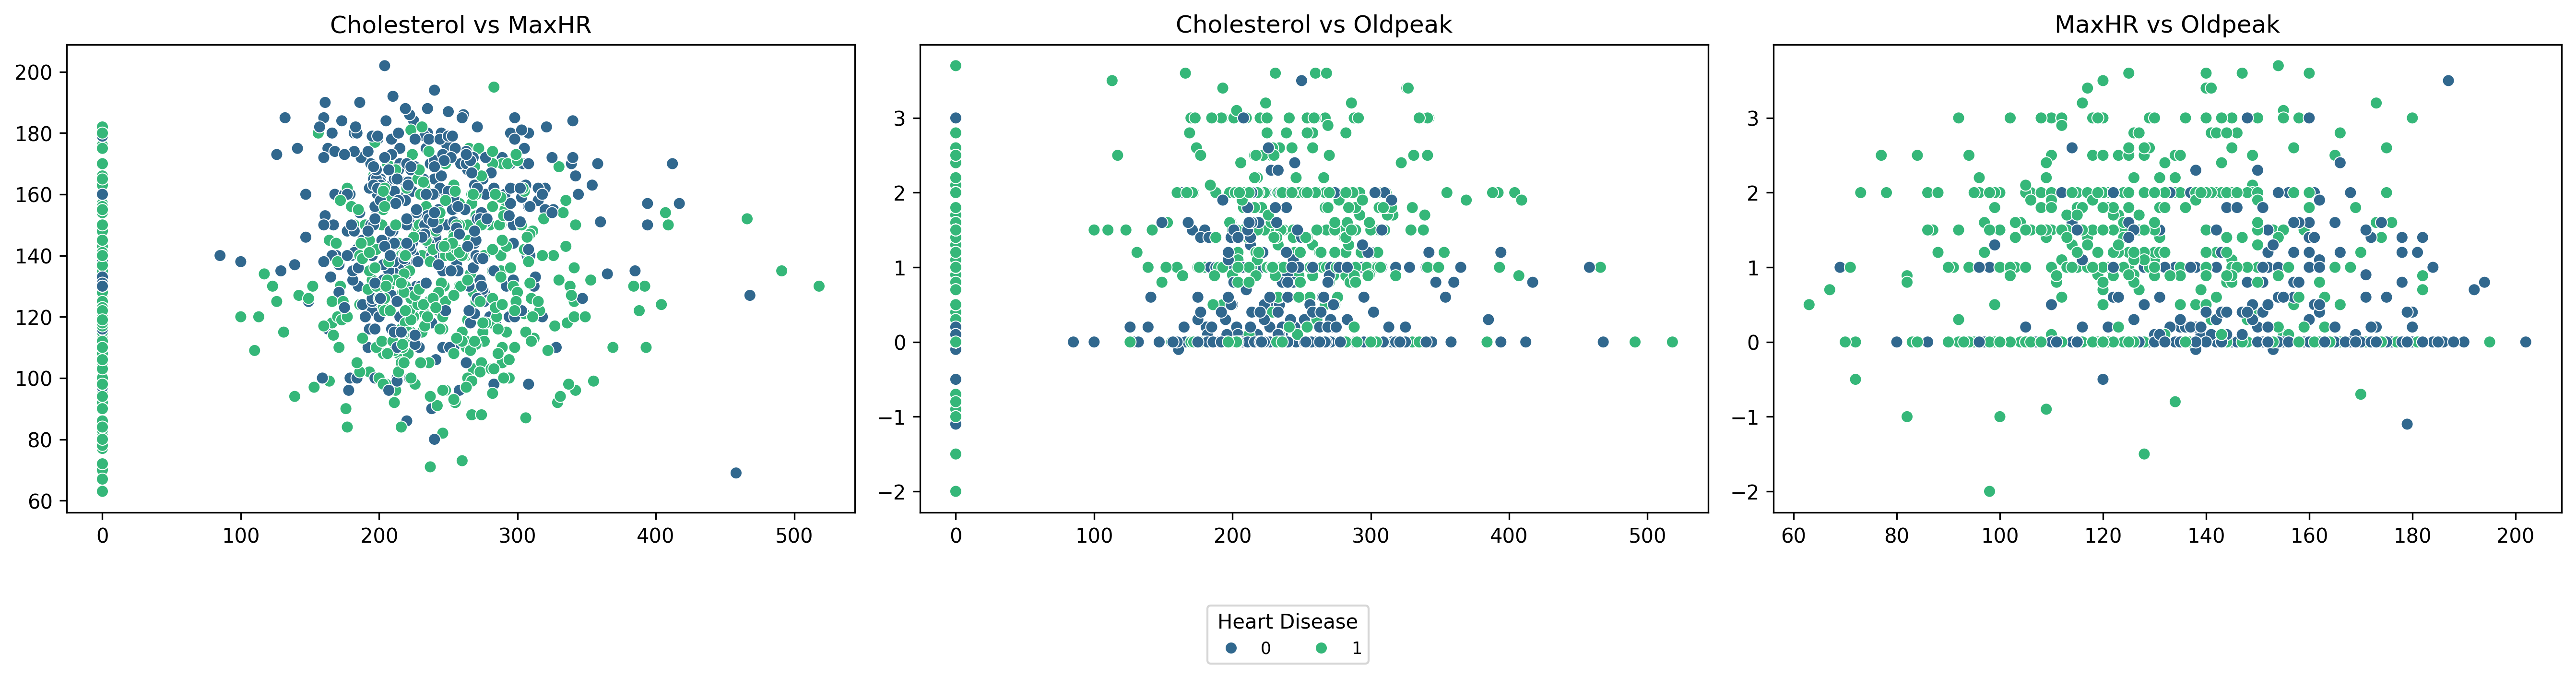

In [56]:
# List of numerical feature pairs
numerical_pairs = [
    ('Cholesterol', 'MaxHR'),
    ('Cholesterol', 'Oldpeak'),
    ('MaxHR', 'Oldpeak')
]

# Set the figure size and resolution
plt.figure(figsize=(18, 4), dpi=300)

# Create a plot for each pair
for i, (x, y) in enumerate(numerical_pairs):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=data, x=x, y=y, hue='HeartDisease', palette='viridis')
    plt.title(f'{x} vs {y}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend().set_visible(False)  
    
# Add a single legend outside the plots
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, title='Heart Disease', bbox_to_anchor=(0.5, -0.05), fontsize='small')
plt.tight_layout() 
plt.show()

**Categorical vs Numerical** 

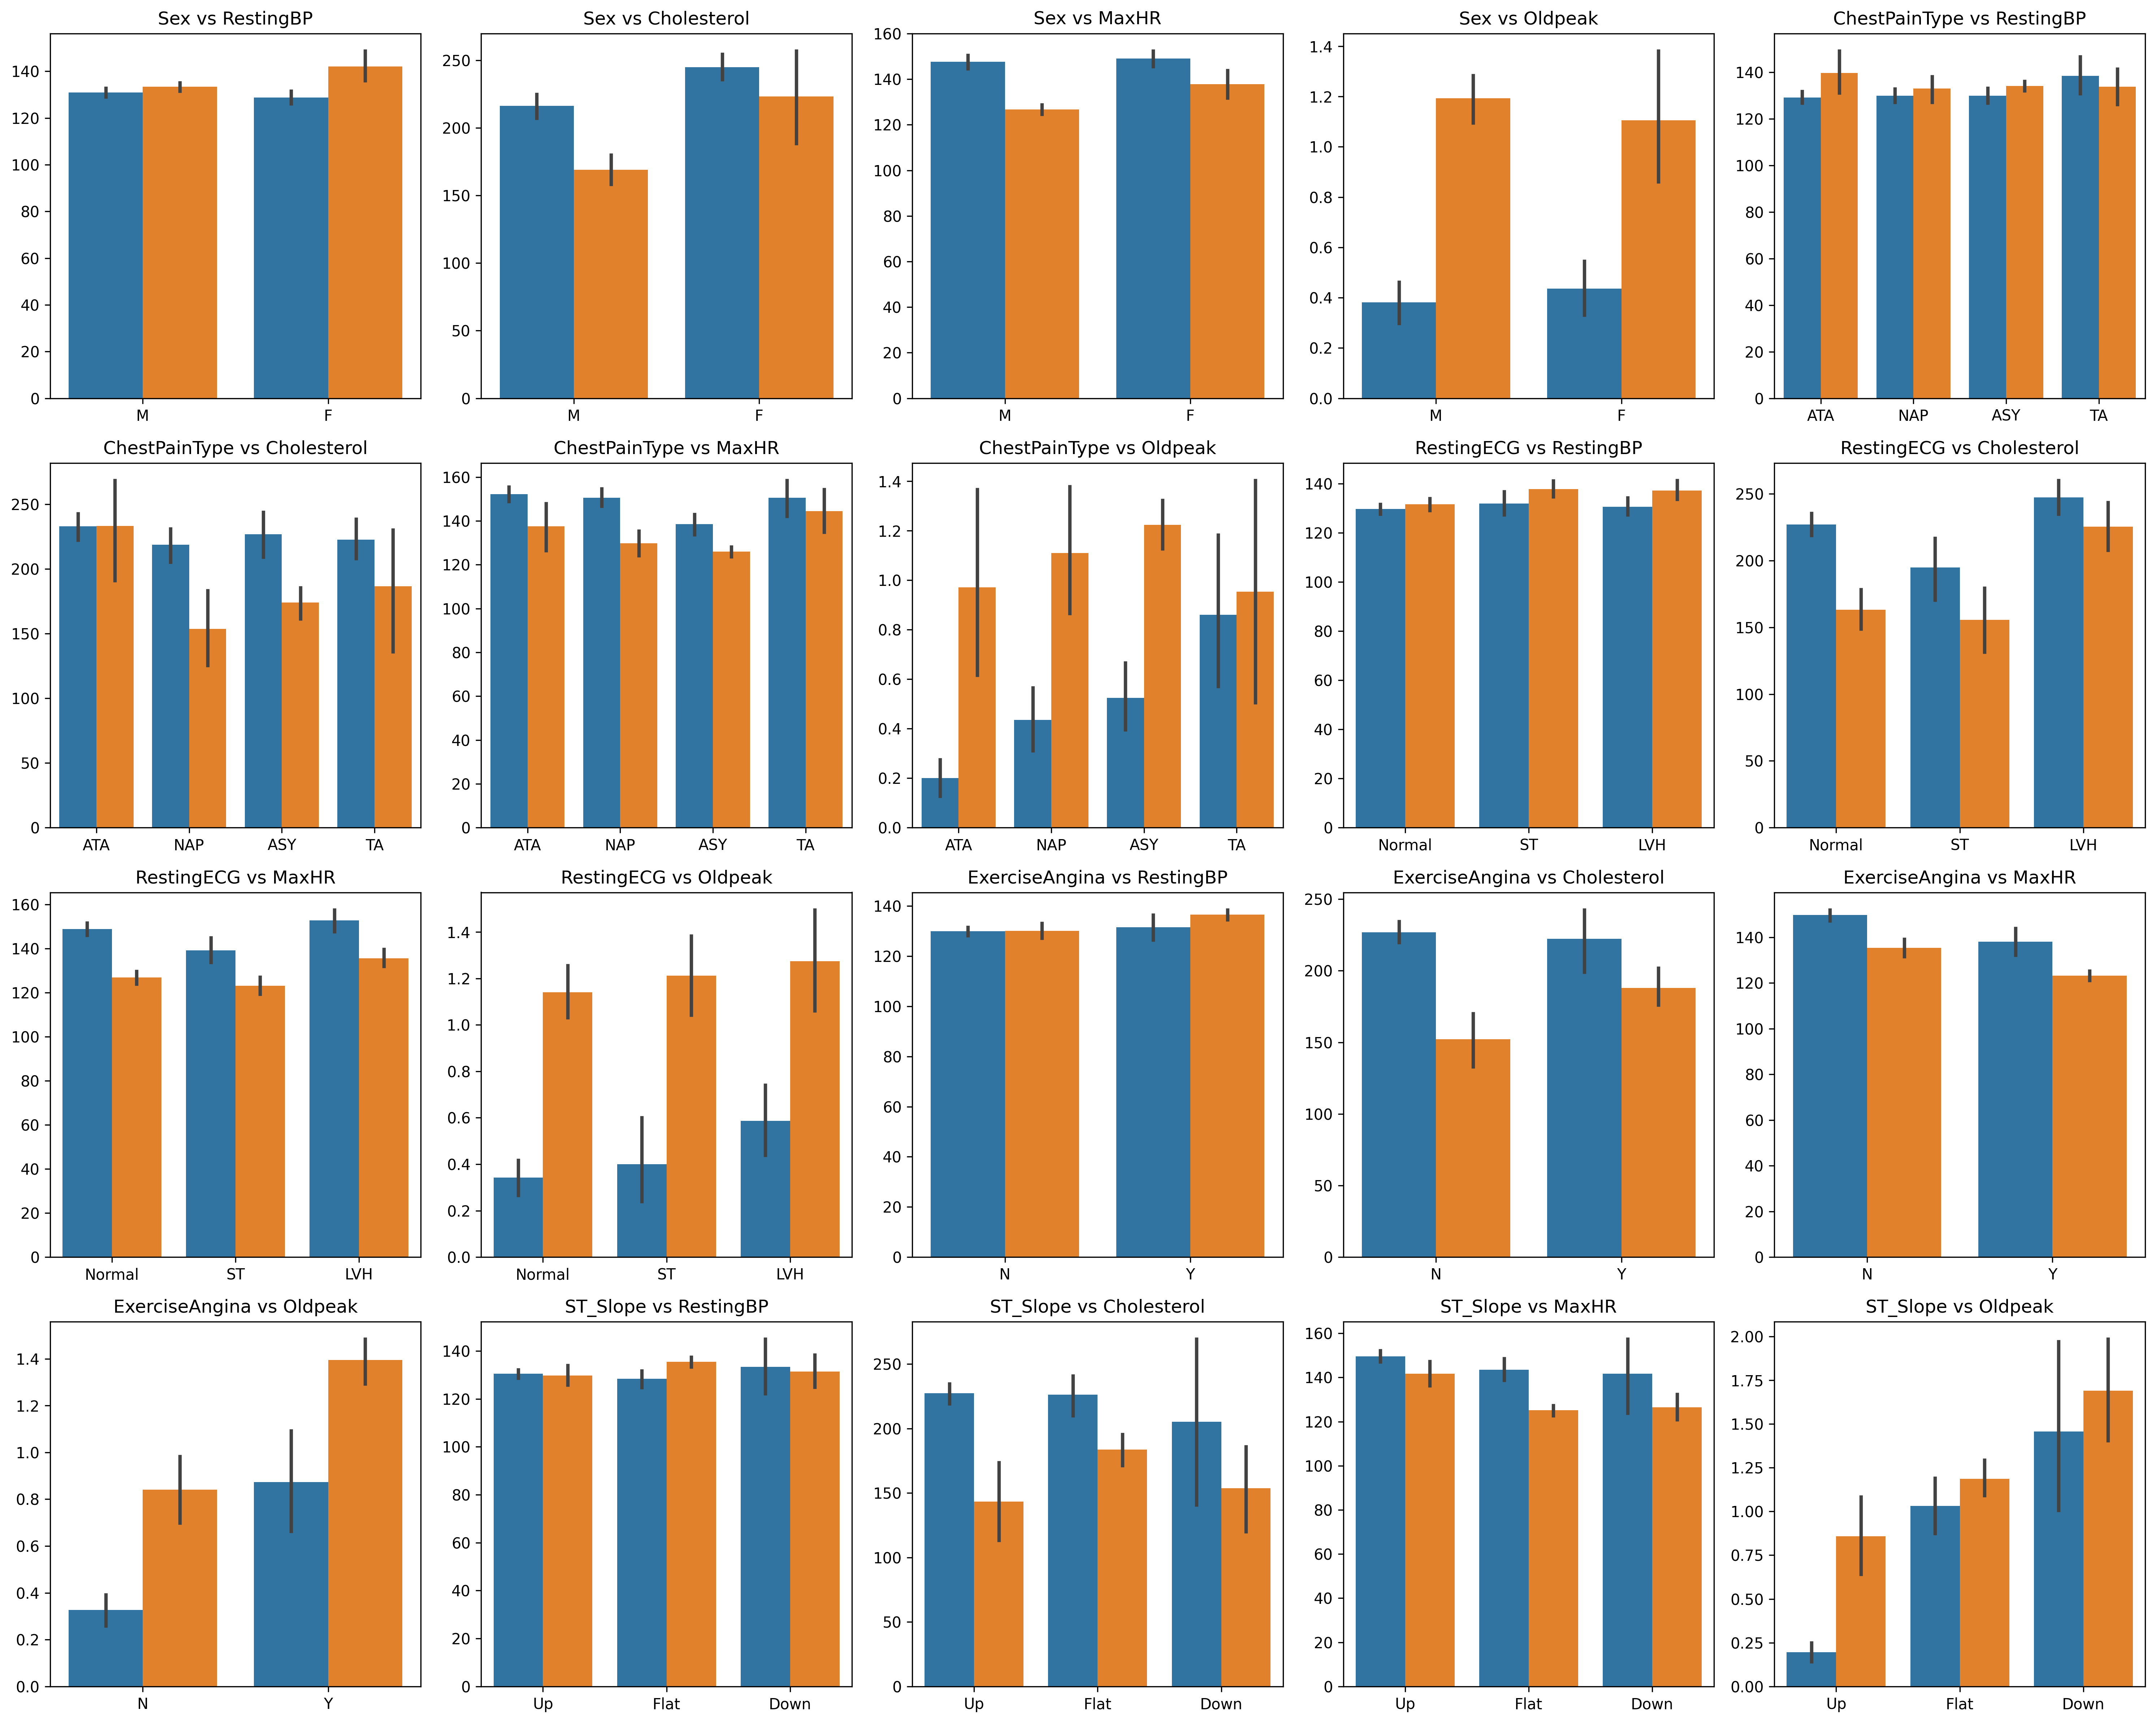

In [57]:
# Define feature pairs for categorical vs numerical plots
categorical_pairs = [
    ('Sex', 'RestingBP'),
    ('Sex', 'Cholesterol'),
    ('Sex', 'MaxHR'),
    ('Sex', 'Oldpeak'),
    ('ChestPainType', 'RestingBP'),
    ('ChestPainType', 'Cholesterol'),
    ('ChestPainType', 'MaxHR'),
    ('ChestPainType', 'Oldpeak'),
    ('RestingECG', 'RestingBP'),
    ('RestingECG', 'Cholesterol'),
    ('RestingECG', 'MaxHR'),
    ('RestingECG', 'Oldpeak'),
    ('ExerciseAngina', 'RestingBP'),
    ('ExerciseAngina', 'Cholesterol'),
    ('ExerciseAngina', 'MaxHR'),
    ('ExerciseAngina', 'Oldpeak'),
    ('ST_Slope', 'RestingBP'),
    ('ST_Slope', 'Cholesterol'),
    ('ST_Slope', 'MaxHR'),
    ('ST_Slope', 'Oldpeak')
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), dpi=300)
axes = axes.flatten()  

# Plot categorical vs numerical box plots
for j, (cat, num) in enumerate(categorical_pairs):
    sns.barplot(data=data, x=cat, y=num, hue='HeartDisease', ax=axes[j])
    axes[j].set_title(f'{cat} vs {num}', fontsize=12)
    axes[j].set_xlabel('')
    axes[j].set_ylabel('')
    axes[j].legend().set_visible(False) 

# Hide unused subplots if any
for k in range(len(categorical_pairs), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

**3. Multivariate: used to examine patterns and relationships involving multiple variables simultaneously.**

- Pairplot : It creates a grid of scatterplots and histograms where each variable in a dataset is plotted against every other variable.
- Heatmap: It is commonly used to visualize the correlation matrix of a dataset, showing the relationships between multiple variables.

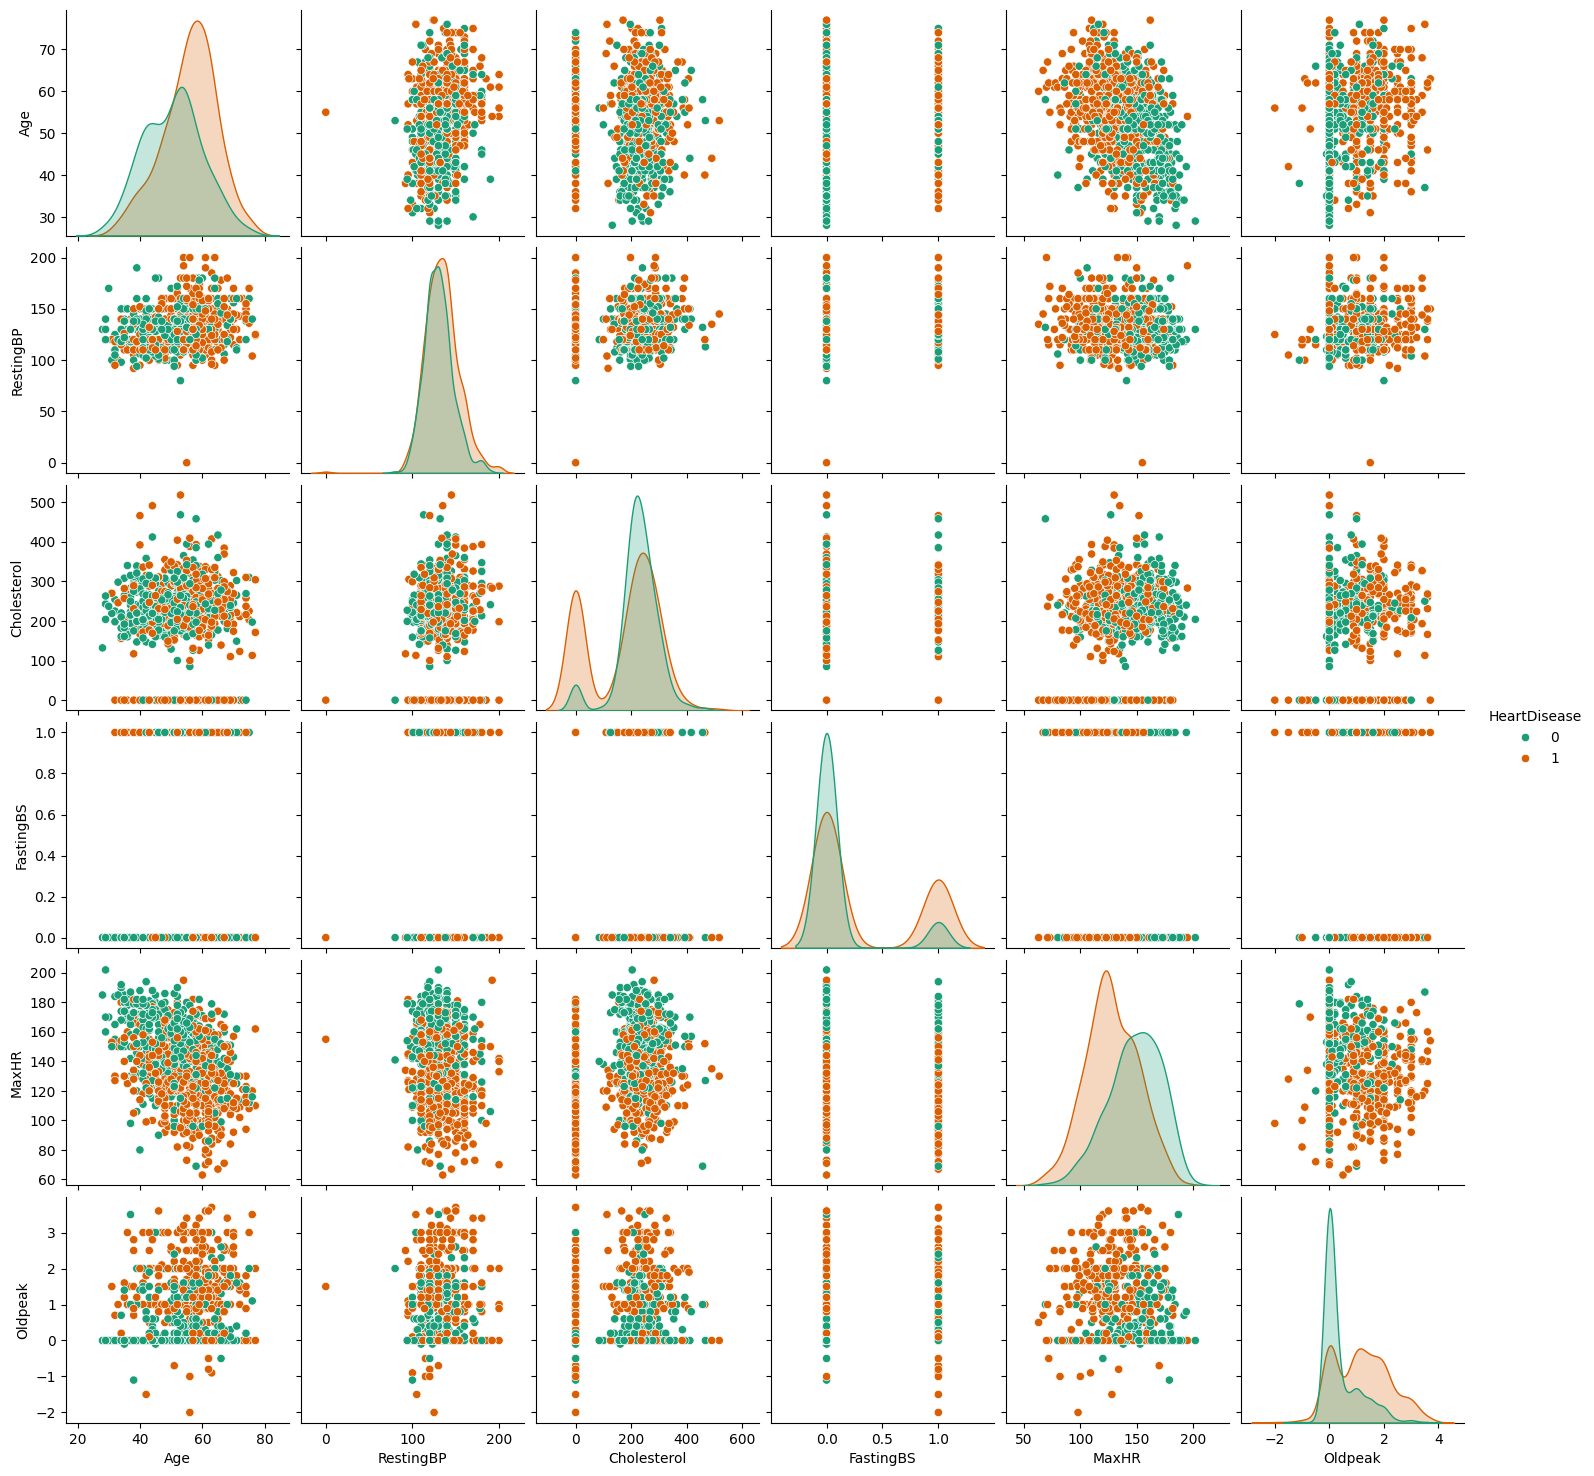

In [58]:
#pair plot for all the numerical columns
sns.pairplot(data,hue='HeartDisease',palette='Dark2')

**Note:**
Based on the visualization of data points in a pairplot, we can make an informed decision about which machine learning algorithm might be suitable for model development. Here are the criteria for selecting an algorithm:

**1. Logistic Regression:** 
* Use if data points are clearly separated in the pairplot.
* Logistic Regression works well when classes are linearly separable, meaning that you can draw a line (or hyperplane in higher dimensions) to separate different classes.

**2. K-Nearest Neighbors (KNN):**
* Use if data points are somewhat overlapped but still show some structure.
* KNN is effective for datasets where boundaries between classes are not clear-cut. It can capture non-linear relationships by considering the local neighborhood of each point.

**3. Decision Tree or XGBoost:**
* Use if data points are heavily overlapped and complex.
* Decision Trees and XGBoost (an advanced gradient boosting method) are powerful for handling complex, non-linear relationships and interactions in the data. They can model more intricate decision boundaries, making them suitable when data is highly overlapping and not easily separable.

In [59]:
#before plotting heat map we need to find the correlation for num_data
num_data.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.094969   0.198039 -0.384837  0.256430   
RestingBP     0.254399   1.000000     0.109445   0.070193 -0.111338  0.133774   
Cholesterol  -0.094969   0.109445     1.000000  -0.269506  0.234828  0.017265   
FastingBS     0.198039   0.070193    -0.269506   1.000000 -0.133918  0.081828   
MaxHR        -0.384837  -0.111338     0.234828  -0.133918  1.000000 -0.175453   
Oldpeak       0.256430   0.133774     0.017265   0.081828 -0.175453  1.000000   
HeartDisease  0.282039   0.107589    -0.239754   0.267291 -0.399456  0.407828   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.239754  
FastingBS         0.267291  
MaxHR            -0.399456  
Oldpeak           0.407828  
HeartDisease      1.000000

<Axes: >

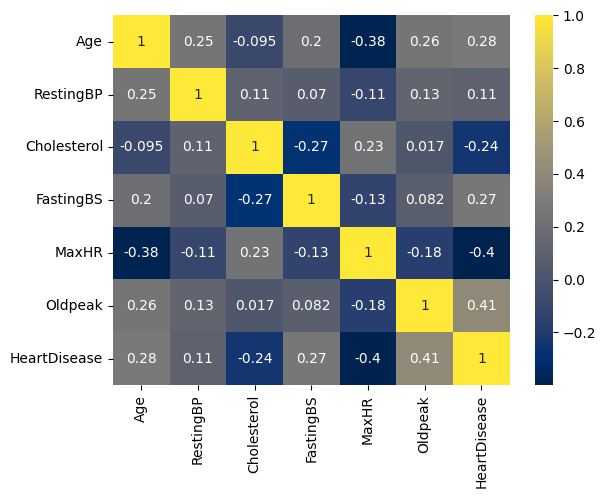

In [60]:
#heat map for num_data
sns.heatmap(num_data.corr(),annot=True, cmap='cividis')

**Inference:**
1. **Age:**
   - Positively correlated with Resting Blood Pressure, Oldpeak, and Heart Disease.
   - Negatively correlated with Maximum Heart Rate.
   - Older age slightly increases the likelihood of heart disease and related factors.

2. **Resting Blood Pressure (RestingBP):**
   - Weak positive correlations with Oldpeak and Heart Disease.
   - Slight association with higher ST depression during exercise and minor heart disease risk.

3. **Cholesterol:**
   - Weakly negatively correlated with Heart Disease and Fasting Blood Sugar.
   - Slightly positively correlated with Maximum Heart Rate.
   - Higher cholesterol may slightly lower heart disease risk, but further investigation is needed.

4. **Fasting Blood Sugar (FastingBS):**
   - Weak positive correlation with Heart Disease.
   - Higher fasting blood sugar slightly increases heart disease risk.

5. **Maximum Heart Rate (MaxHR):**
   - Negatively correlated with Heart Disease.
   - Higher maximum heart rate may reduce heart disease risk.

6. **Oldpeak:**
   - Moderately positively correlated with Heart Disease.
   - Higher ST depression during exercise increases heart disease risk.

7. **Heart Disease:**
   - Positively associated with Age, Fasting Blood Sugar, and Oldpeak.
   - Negatively associated with Maximum Heart Rate.
   - Age, high fasting blood sugar, and ST depression are risk factors; higher MaxHR may be protective.


### Step 6 : Data Transformation

In [61]:
df1 = data.copy()

**6.1. Encoding Categorical Variables**

Encoding is used to convert categorical data into numerical data.

- **Label Encoder** : It converts categorical values into numerical values, where each unique category is assigned an integer. This method is useful for binary or ordinal categorical variables.

- **One Hot Encoder /dummies** : It converts categorical variables into a series of binary columns, each representing a single category. Each row has a value of 1 for the corresponding category and 0 for all others.

- **Manual Encoder** : It involves explicitly mapping categorical values to numerical values based on domain knowledge or specific rules. This method gives full control over how categories are converted.

- **Frequency Encoder** : It replaces each category in a variable with the frequency of that category in the dataset. This method assigns a number proportional to how common the category is.


In [62]:
#label encoder for Sex
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1['Sex']=le.fit_transform(df1['Sex'])

In [63]:
# One-Hot encoder for ChestPainType
df1=pd.get_dummies(df1,columns=['ChestPainType'],dtype=int,drop_first=True)

In [64]:
# One-Hot encoder for RestingECG
df1=pd.get_dummies(df1,columns=['RestingECG'],dtype=int,drop_first=True)

In [65]:
#label encoding for ExerciseAngina
df1['ExerciseAngina']=le.fit_transform(df1['ExerciseAngina'])

In [66]:
# manual encoder for ST_Slope
df1['ST_Slope']=df1['ST_Slope'].map({'Up':0,'Flat':1,'Down':2})

In [67]:
df1.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140        289.0          0  172.0               0   
1   49    0        160        180.0          0  156.0               0   
2   37    1        130        283.0          0   98.0               0   
3   48    0        138        214.0          0  108.0               1   
4   54    1        150        195.0          0  122.0               0   

   Oldpeak  ST_Slope  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0         0             0                  1                  0   
1      1.0         1             1                  0                  1   
2      0.0         0             0                  1                  0   
3      1.5         1             1                  0                  0   
4      0.0         0             0                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  
0                 0                  1              0  
1                 0                  1              0  
2                 0                  0              1  
3                 0                  1              0  
4                 0                  1              0

In [68]:
# Getting the target column at the end
target="HeartDisease"
y=df1[target].values
df1.drop("HeartDisease",axis=1,inplace=True)
df1=pd.concat([df1,data[target]],axis=1)
df1.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140        289.0          0  172.0               0   
1   49    0        160        180.0          0  156.0               0   
2   37    1        130        283.0          0   98.0               0   
3   48    0        138        214.0          0  108.0               1   
4   54    1        150        195.0          0  122.0               0   

   Oldpeak  ST_Slope  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      0.0         0                  1                  0                 0   
1      1.0         1                  0                  1                 0   
2      0.0         0                  1                  0                 0   
3      1.5         1                  0                  0                 0   
4      0.0         0                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  HeartDisease  
0                  1              0             0  
1                  1              0             1  
2                  0              1             0  
3                  1              0             1  
4                  1              0             0

**6.2. Scaling/ Normalization**

Scaling is applied to transform continuous input variables to a specific scale, which is particularly important in distance-based algorithms.
- Min-Max Scaler
- Standard Scaler

**1. Min-Max Scaler**
- This technique scales all values to a range between 0 and 1.
- min_max = ( x - x_min ) / ( x_max - x_min )

**2. Standard Scaler**
- This method transforms values to follow a standard normal distribution with a mean of 0 and a standard deviation of 1.
- z = x - mean / standard deviation

In [69]:
df2 = df1.copy()

In [70]:
#apply min max scaler only to continuous numerical data
#scaling is always applied to input variables
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

# List of columns to standardize
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
df2[columns_to_scale] = scaling.fit_transform(df2[columns_to_scale])

**6.3. Data Splitting**

In [71]:
#split the data into features(x) and target(y)
X = df2.drop('HeartDisease',axis=1)
y = df2['HeartDisease']

**6.4 Feature Selection**

**Mutual Information:**
'mutual_info_classif'  is used for feature selection because it provides a measure of how much information each feature contributes towards predicting the target variable. It helps in identifying the most relevant features, handling non-linear relationships, reducing dimensionality, and ultimately improving model performance.

In [72]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.05009149, 0.03899486, 0.00136105, 0.06249203, 0.0633498 ,
       0.07484311, 0.12701185, 0.11501318, 0.18502336, 0.08508785,
       0.00186798, 0.        , 0.        , 0.02567309])

In [73]:
mutual_info= pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ST_Slope             0.185023
ExerciseAngina       0.127012
Oldpeak              0.115013
ChestPainType_ATA    0.085088
MaxHR                0.074843
FastingBS            0.063350
Cholesterol          0.062492
Age                  0.050091
Sex                  0.038995
RestingECG_ST        0.025673
ChestPainType_NAP    0.001868
RestingBP            0.001361
ChestPainType_TA     0.000000
RestingECG_Normal    0.000000
dtype: float64

<Axes: >

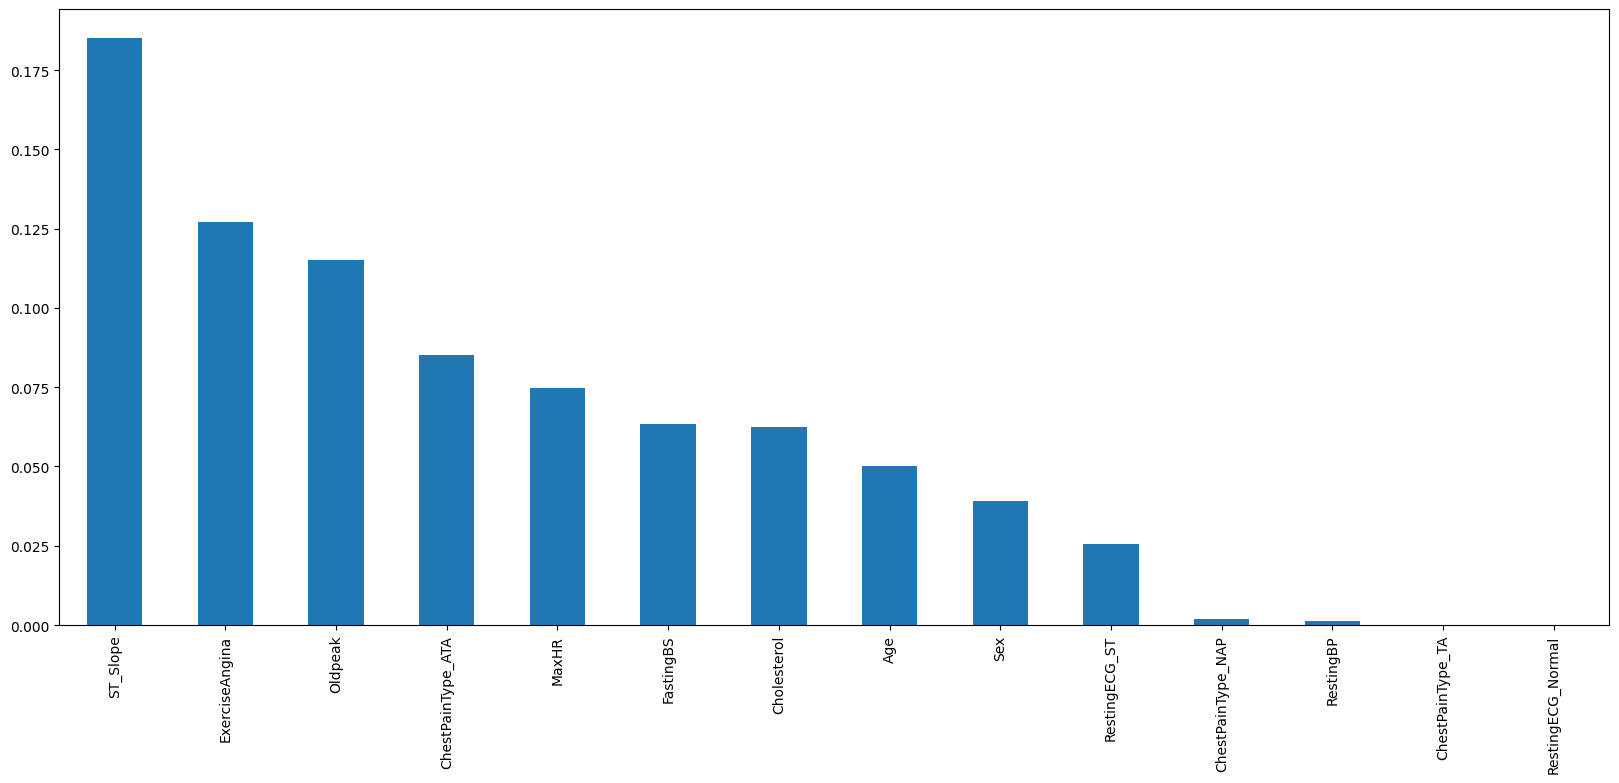

In [74]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

**Inference:**
* Based on the mutual information scores , I have selected top 11 features for the model training.

In [75]:
from sklearn.feature_selection import SelectKBest

In [76]:
# Now we will select the top 11 features
top_features = SelectKBest(mutual_info_classif, k= 11)
top_features.fit(X.fillna(0),y)
sel_features = X.columns[top_features.get_support()]

In [77]:
# Filter X_train to keep only the selected features
X = X[sel_features]

In [78]:
X.head()

Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.433140    1   0.410909     0.851982  -0.551341  1.386546               0   
1 -0.478484    0   1.491752    -0.164077  -0.551341  0.754627               0   
2 -1.751359    1  -0.129513     0.796052  -0.551341 -1.536076               0   
3 -0.584556    0   0.302825     0.152859  -0.551341 -1.141127               1   
4  0.051881    1   0.951331    -0.024253  -0.551341 -0.588199               0   

    Oldpeak  ST_Slope  ChestPainType_ATA  ChestPainType_NAP  
0 -0.871889         0                  1                  0  
1  0.173015         1                  0                  1  
2 -0.871889         0                  1                  0  
3  0.695467         1                  0                  0  
4 -0.871889         0                  0                  1

In [79]:
#split the data into training and testing sets i.e 70-30 or 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Step 7: Modelling

#### 7.1. Classification Model Training and Evaluation Process

1. **Trained Multiple Classification Algorithms:**
- Tested 8 different classification algorithms including Logistic Regression, Decision Tree, Random Forest, XGBoost, Gradient Boosting, ANN, KNN, and SVM to find the best algorithm for this project.

2. **Applied Cross-Validation:**
- To Ensure that the model's performance is consistent across different subsets of the data.
- Used 5-fold cross-validation, which splits the data into 5 parts, training the model on 4 parts and validating it on the remaining 1 part in each fold. This process is repeated 5 times, with each part serving as the validation set exactly once.

3. **Evaluated Initial Models:**
- **Metrics Used:**

   - **Classification Report:** Provides precision, recall, and F1-score for each class.
      - **Precision:** Measures how many of the predicted positive cases are actually positive.
      - **Recall:** Measures how many of the actual positive cases were correctly predicted.
      - **F1-Score:** Combines precision and recall into a single metric, balancing the two.

   - **Confusion Matrix:** Shows the number of true positive, true negative, false positive, and false negative predictions.
      - **True Positives (TP):** Correctly predicted positive cases.
      - **True Negatives (TN):** Correctly predicted negative cases.
      - **False Positives (FP):** Incorrectly predicted positive cases.
      - **False Negatives (FN):** Incorrectly predicted negative cases.

   - **ROC-AUC Curve:** Measures the model’s ability to distinguish between classes.
      - **ROC Curve:** Plots the True Positive Rate (Recall) against the False Positive Rate.
      - **AUC (Area Under the Curve):** Indicates how well the model can distinguish between the classes, with 1 being perfect and 0.5 being no better than random guessing.

4. **Performed Hyperparameter Tuning:**
- To improve the performance of the selected model by finding the best combination of hyperparameters.
- Used Grid Search with Cross-Validation (GridSearchCV), which tests various combinations of parameters and selects the best ones based on performance.

5. **Re-evaluated the Model:**
- Metrics are used again to check for improvements.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from imblearn.over_sampling import SMOTE

#### SMOTE
**What is SMOTE?**
* Stands for Synthetic Minority Over-sampling Technique.
* Balances datasets with unequal class sizes.

**Why Use SMOTE?**
* *Imbalanced Data:* Helps when one class has many more examples than the other.
* *Bias Reduction:* Prevents the model from favoring the majority class.

**How Does SMOTE Work?**
* *Synthetic Examples:* Creates new examples for the minority class by blending existing ones.
* *Balanced Dataset:* Adds these synthetic examples to make the classes more balanced.

In [81]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**1. Logistic Regression**

In [82]:
model_LR = LogisticRegression()

In [83]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_LR, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.96239807 0.91061706 0.90365854 0.91968673 0.89259486]
Mean ROC-AUC Score: 0.92
Standard Deviation of ROC-AUC Scores: 0.02


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



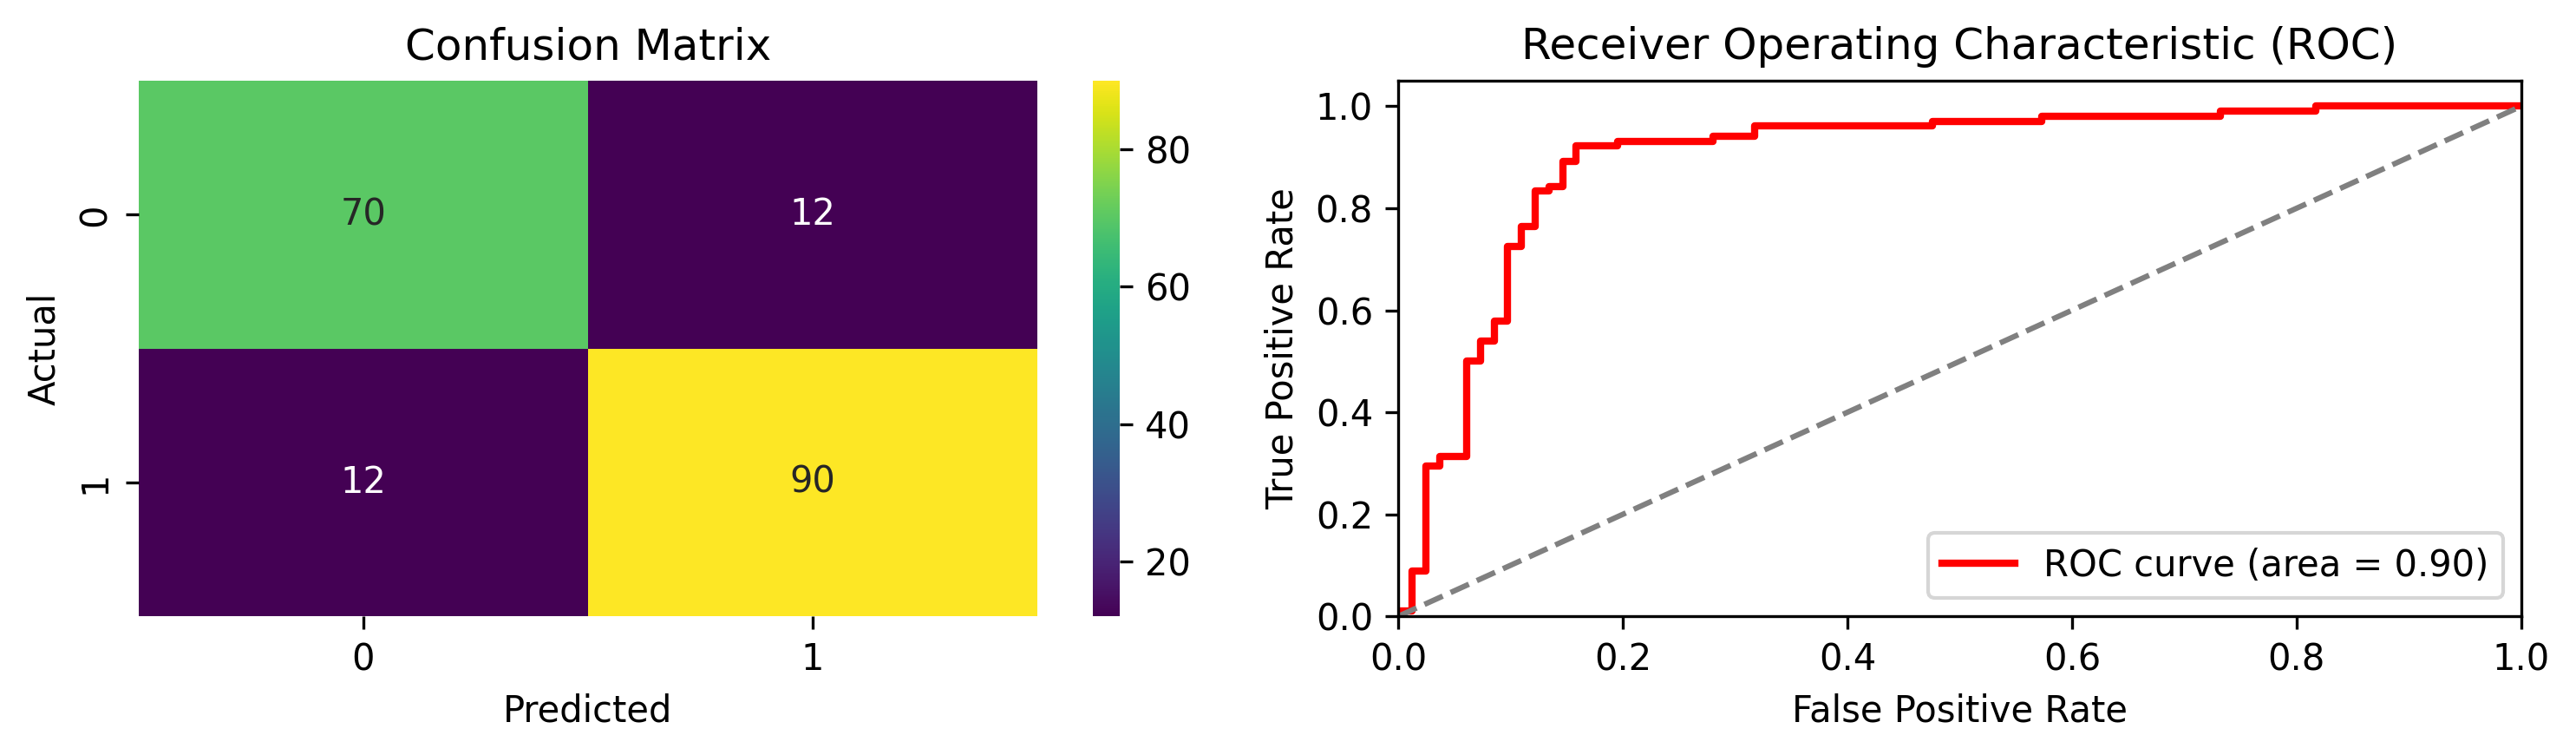

In [84]:
# Fit the model and predict
model_LR.fit(X_train_resampled, y_train_resampled)
y_pred_LR = model_LR.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_LR))
conf_matrix = confusion_matrix(y_test, y_pred_LR)

# Predict probabilities and compute ROC-AUC
y_prob = model_LR.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [85]:
# hyper parameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'], 
    'solver': ['liblinear', 'newton-cg', 'lbfgs'] 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_LR,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_LR = grid_search.best_estimator_
best_model_LR.fit(X_train_resampled, y_train_resampled)
y_pred_LR_tuned = best_model_LR.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.92


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



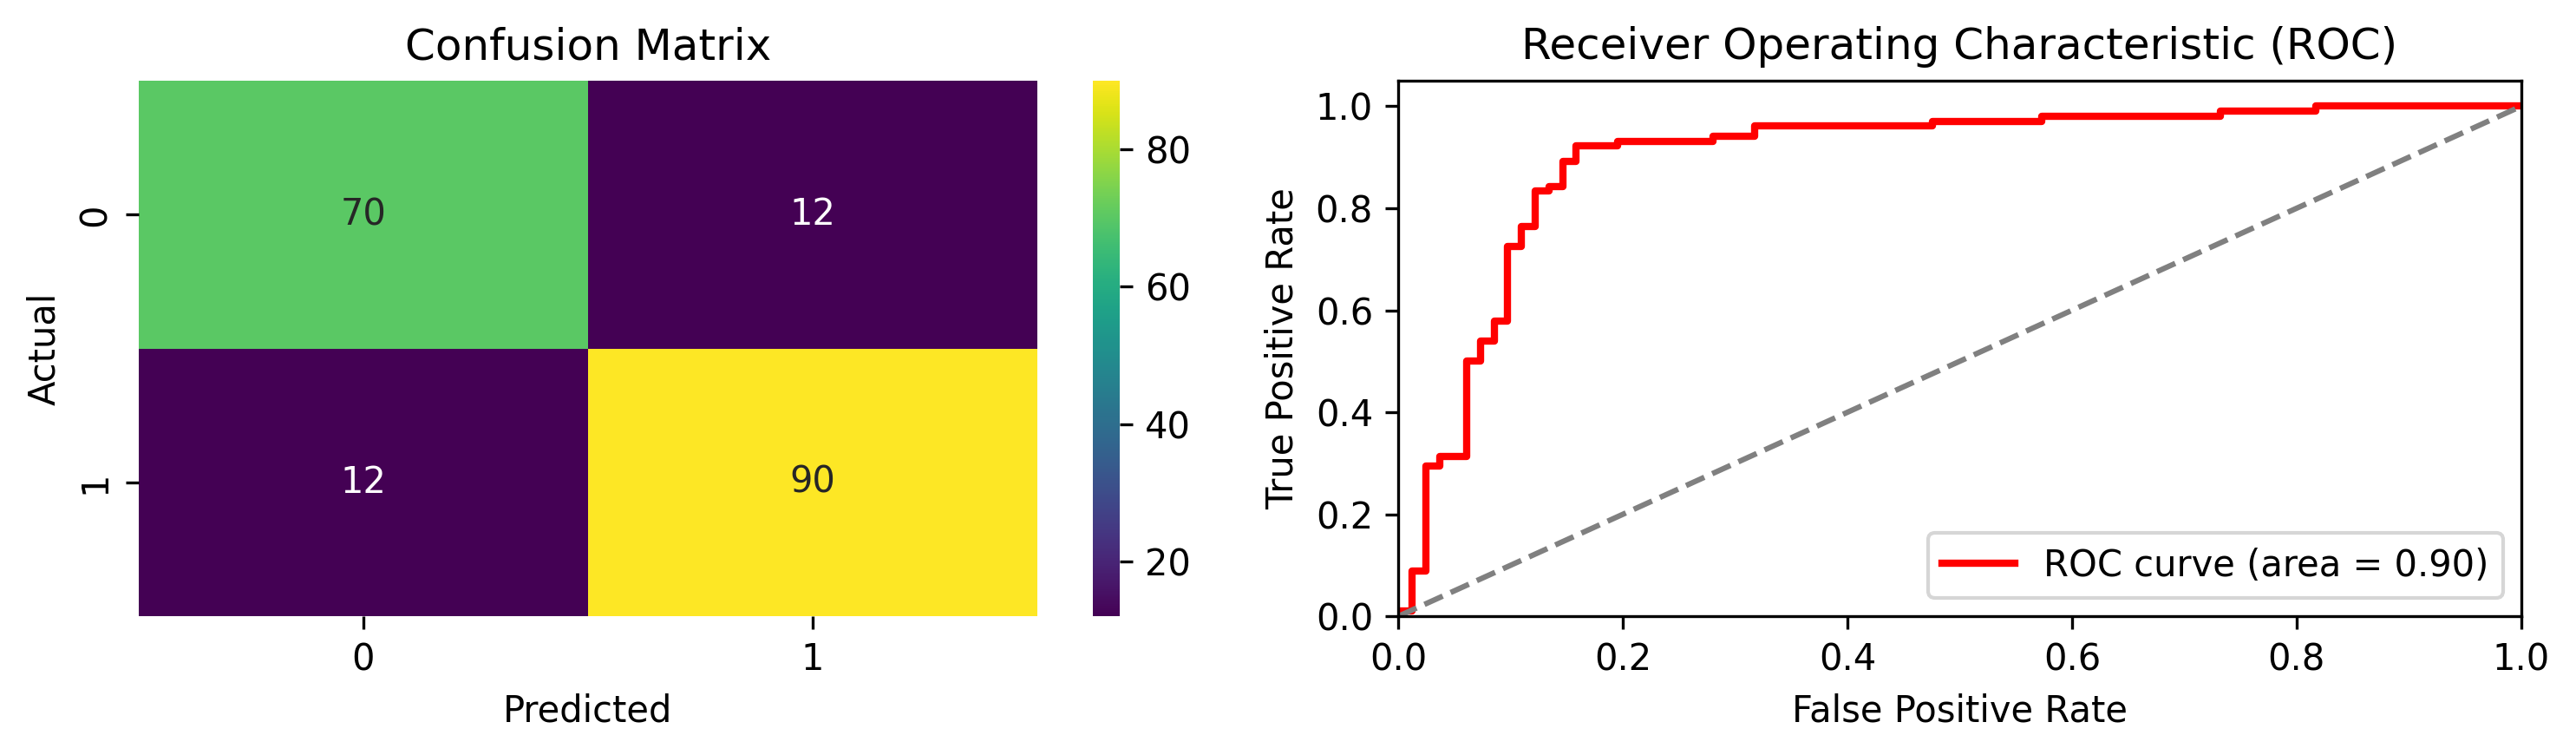

In [86]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_LR_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_LR_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_LR.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**2. DecisionTree Classification**

In [87]:
model_DT = DecisionTreeClassifier()

In [88]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_DT, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.84513742 0.77654265 0.78353659 0.78961916 0.79513464]
Mean ROC-AUC Score: 0.80
Standard Deviation of ROC-AUC Scores: 0.02


              precision    recall  f1-score   support

           0       0.74      0.77      0.75        82
           1       0.81      0.78      0.80       102

    accuracy                           0.78       184
   macro avg       0.77      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



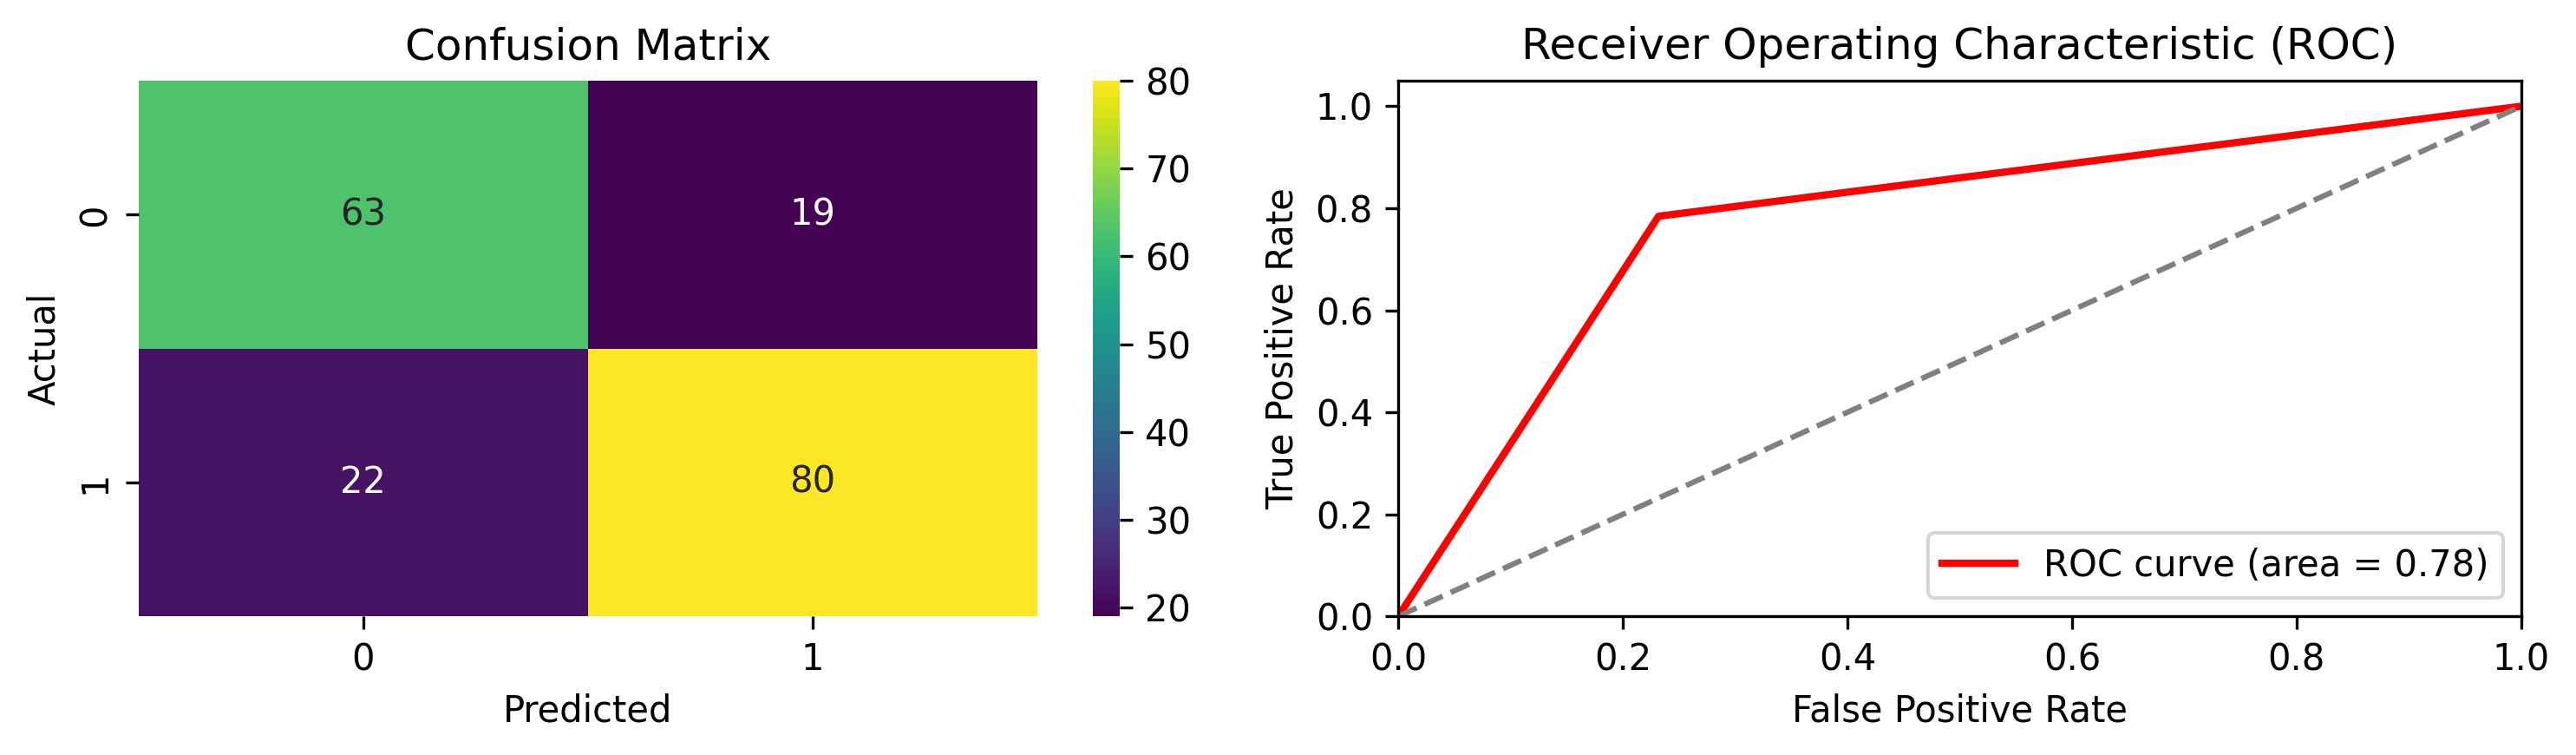

In [89]:
# Fit the model and predict
model_DT.fit(X_train_resampled, y_train_resampled)
y_pred_DT = model_DT.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_DT))
conf_matrix = confusion_matrix(y_test, y_pred_DT)

# Predict probabilities and compute ROC-AUC
y_prob = model_DT.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [90]:
# hyper parameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],              
    'max_depth': [None, 10, 20, 30, 40, 50],       
    'min_samples_split': [2, 5, 10],                
    'min_samples_leaf': [1, 2, 4],                
    'max_features': [None, 'sqrt', 'log2']         
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_DT,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_DT = grid_search.best_estimator_
best_model_DT.fit(X_train_resampled, y_train_resampled)
y_pred_DT_tuned = best_model_DT.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Score: 0.89


              precision    recall  f1-score   support

           0       0.80      0.73      0.76        82
           1       0.80      0.85      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



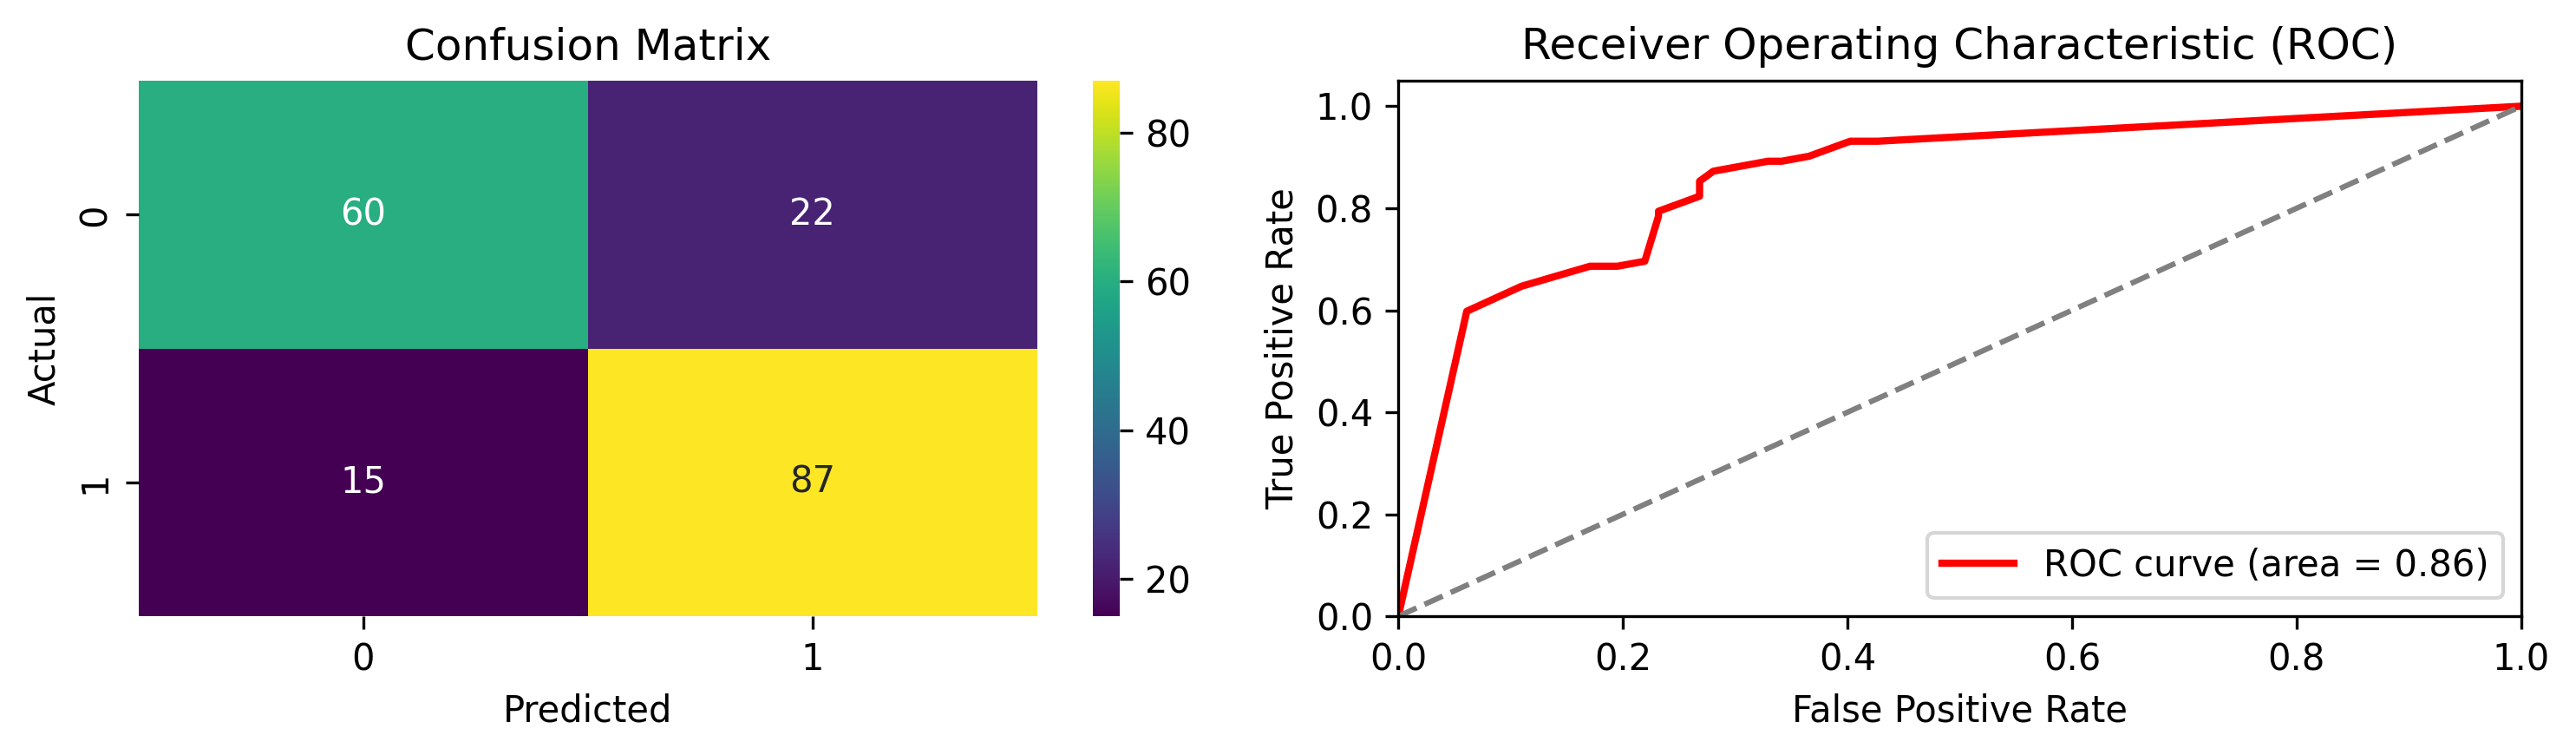

In [91]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_DT_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_DT_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_DT.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**3. RandomForest Classification**

In [92]:
model_RF = RandomForestClassifier()

In [93]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_RF, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.97342193 0.930732   0.92629573 0.91937961 0.92082313]
Mean ROC-AUC Score: 0.93
Standard Deviation of ROC-AUC Scores: 0.02


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



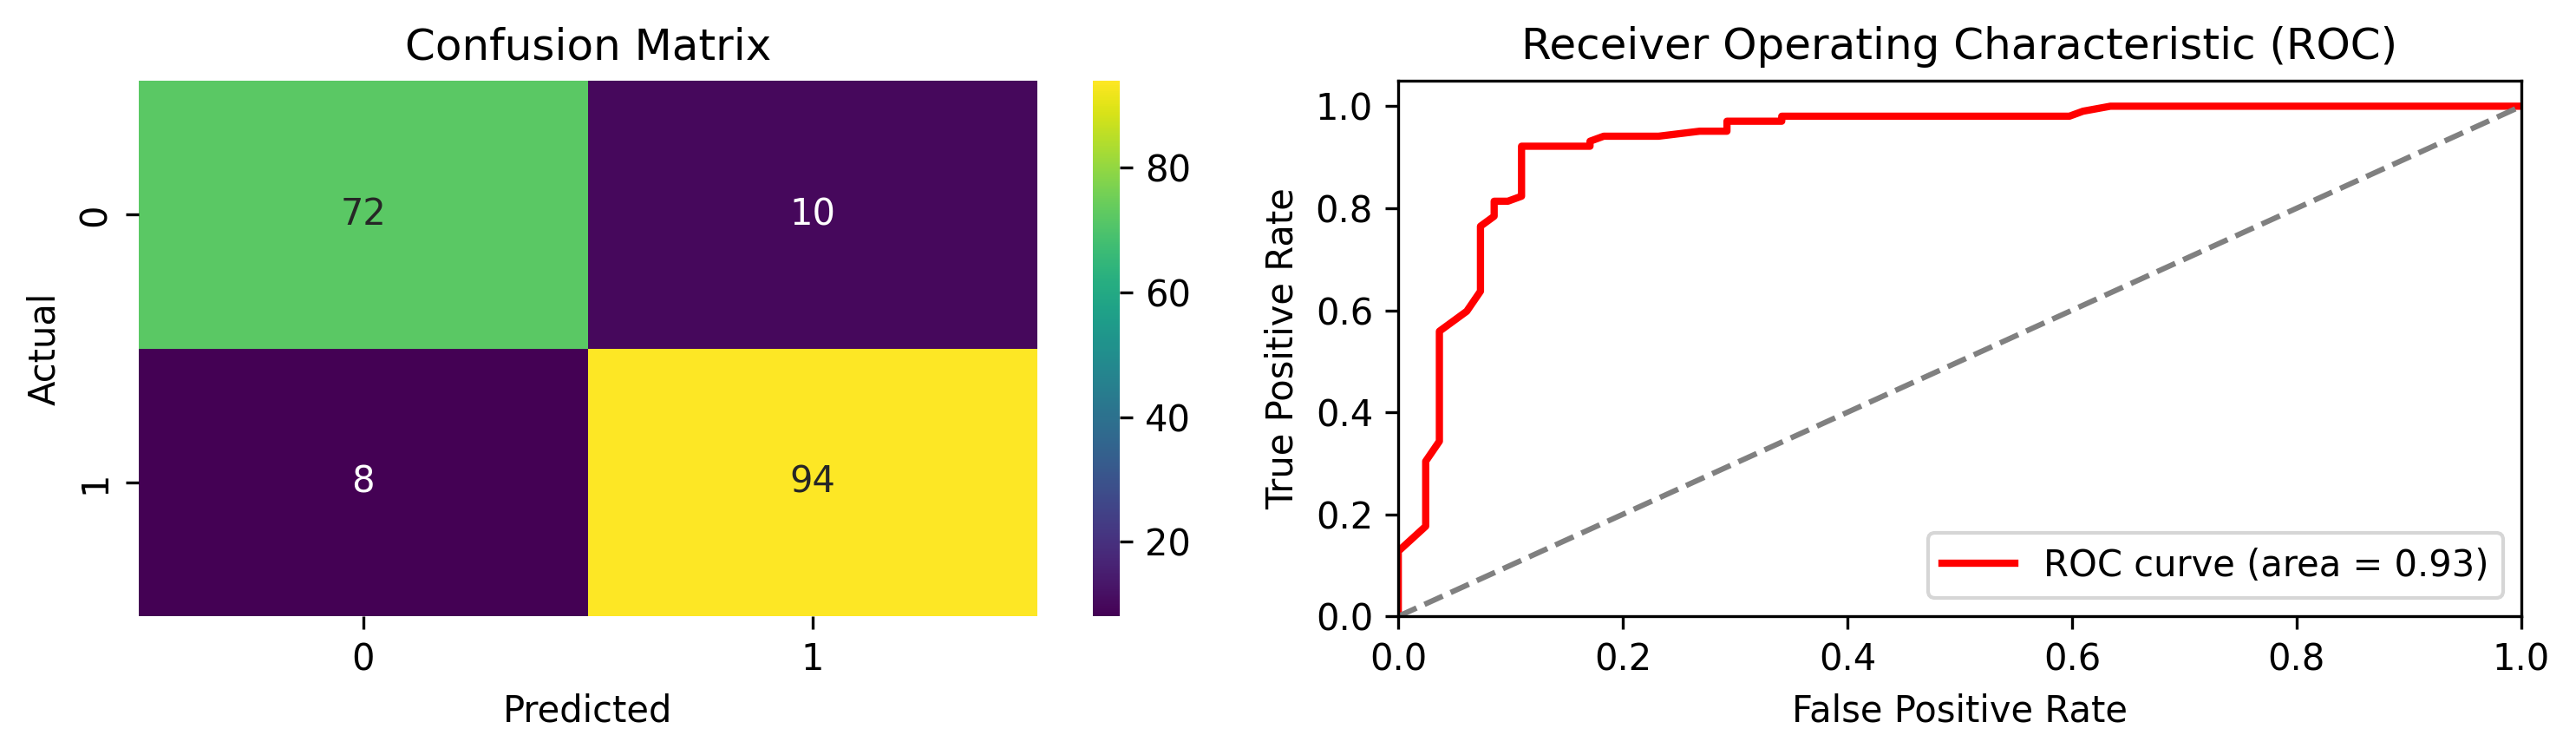

In [94]:
# Fit the model and predict
model_RF.fit(X_train_resampled, y_train_resampled)
y_pred_RF = model_RF.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_RF))
conf_matrix = confusion_matrix(y_test, y_pred_RF)

# Predict probabilities and compute ROC-AUC
y_prob = model_RF.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [95]:
# hyper parameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],              
    'max_depth': [None, 10, 20, 30, 40, 50],           
    'min_samples_split': [2, 5, 10],                    
    'min_samples_leaf': [1, 2, 4],                     
    'max_features': ['auto', 'sqrt', 'log2']        
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_RF,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_RF = grid_search.best_estimator_
best_model_RF.fit(X_train_resampled, y_train_resampled)
y_pred_RF_tuned = best_model_RF.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Score: 0.94


              precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



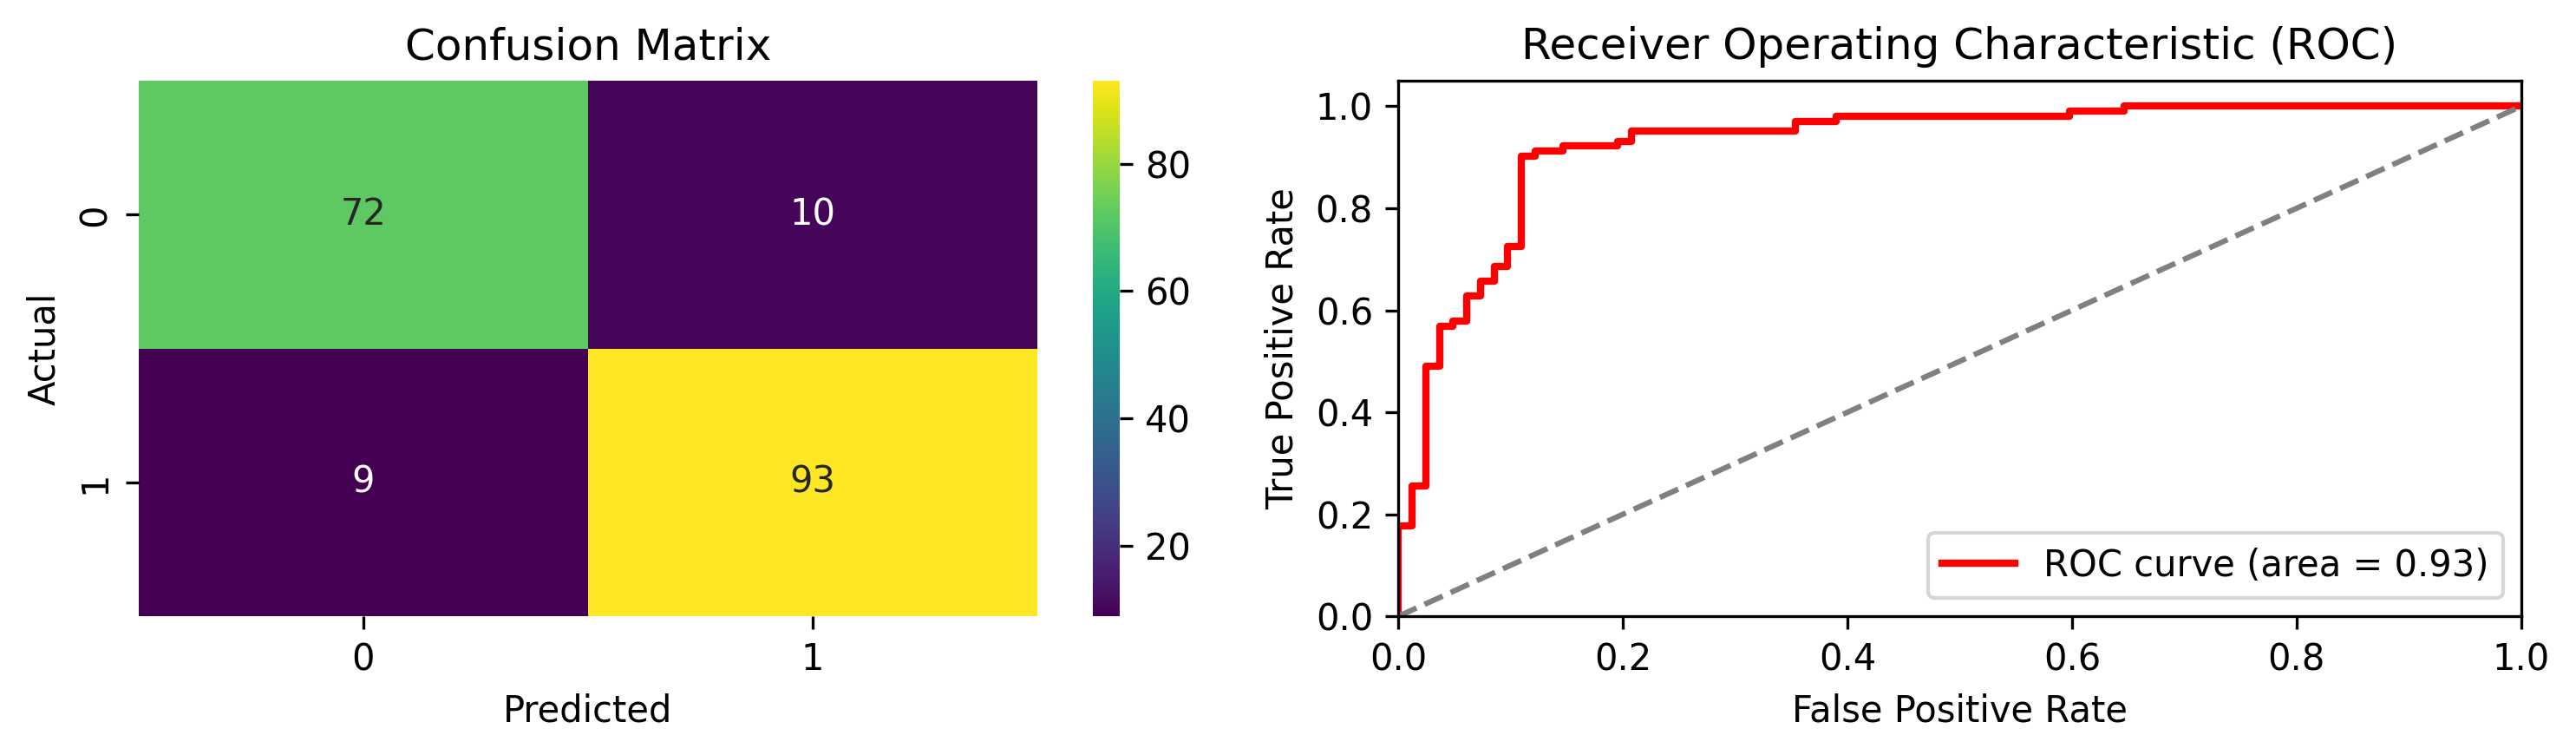

In [96]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_RF_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_RF_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_RF.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**4. XGBoost Classification**

In [97]:
model_XGB = xgb.XGBClassifier()

In [98]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_XGB, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.97447901 0.91651543 0.91417683 0.91400491 0.89687882]
Mean ROC-AUC Score: 0.92
Standard Deviation of ROC-AUC Scores: 0.03


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.89      0.87      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



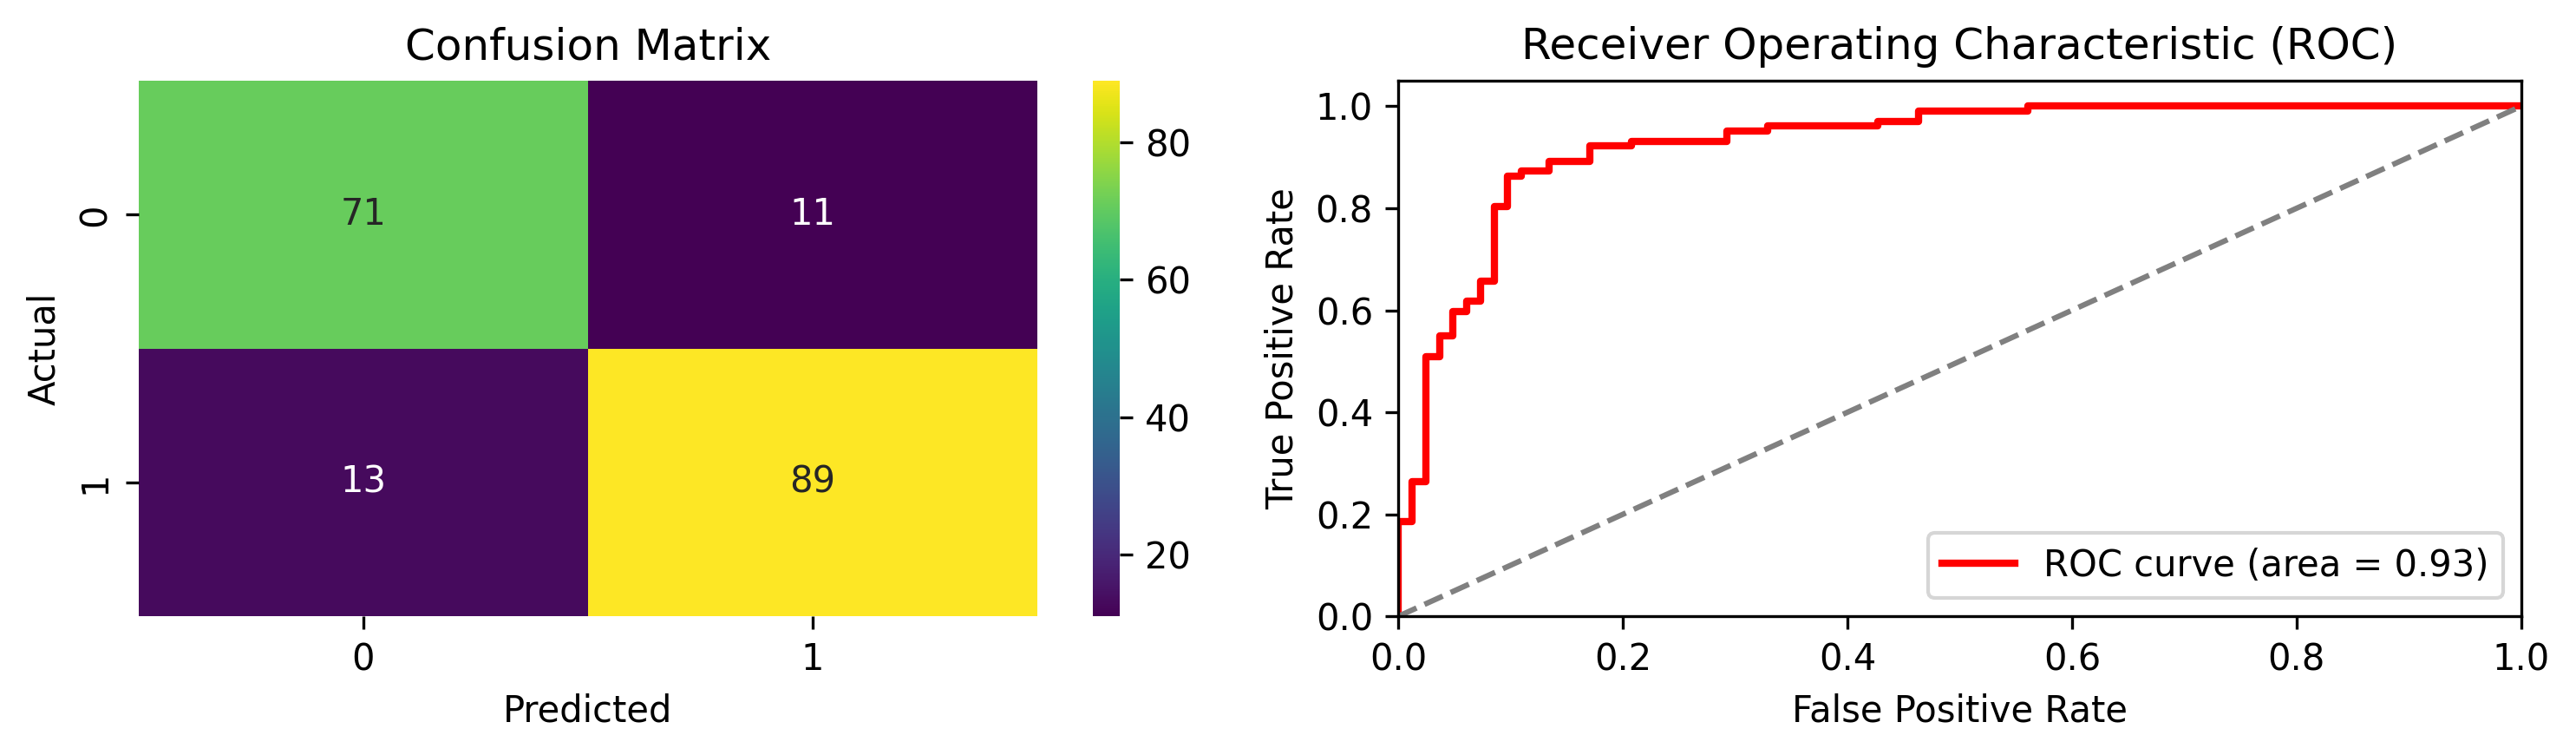

In [99]:
# Fit the model and predict
model_XGB.fit(X_train_resampled, y_train_resampled)
y_pred_XGB = model_XGB.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_XGB))
conf_matrix = confusion_matrix(y_test, y_pred_XGB)

# Predict probabilities and compute ROC-AUC
y_prob = model_XGB.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [100]:
# hyper parameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],                
    'learning_rate': [0.01, 0.1, 0.2],             
    'max_depth': [3, 5, 7, 10],                   
    'subsample': [0.8, 0.9, 1.0],                  
    'colsample_bytree': [0.8, 0.9, 1.0]            
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_XGB,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_XGB = grid_search.best_estimator_
best_model_XGB.fit(X_train_resampled, y_train_resampled)
y_pred_XGB_tuned = best_model_XGB.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Score: 0.94


              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



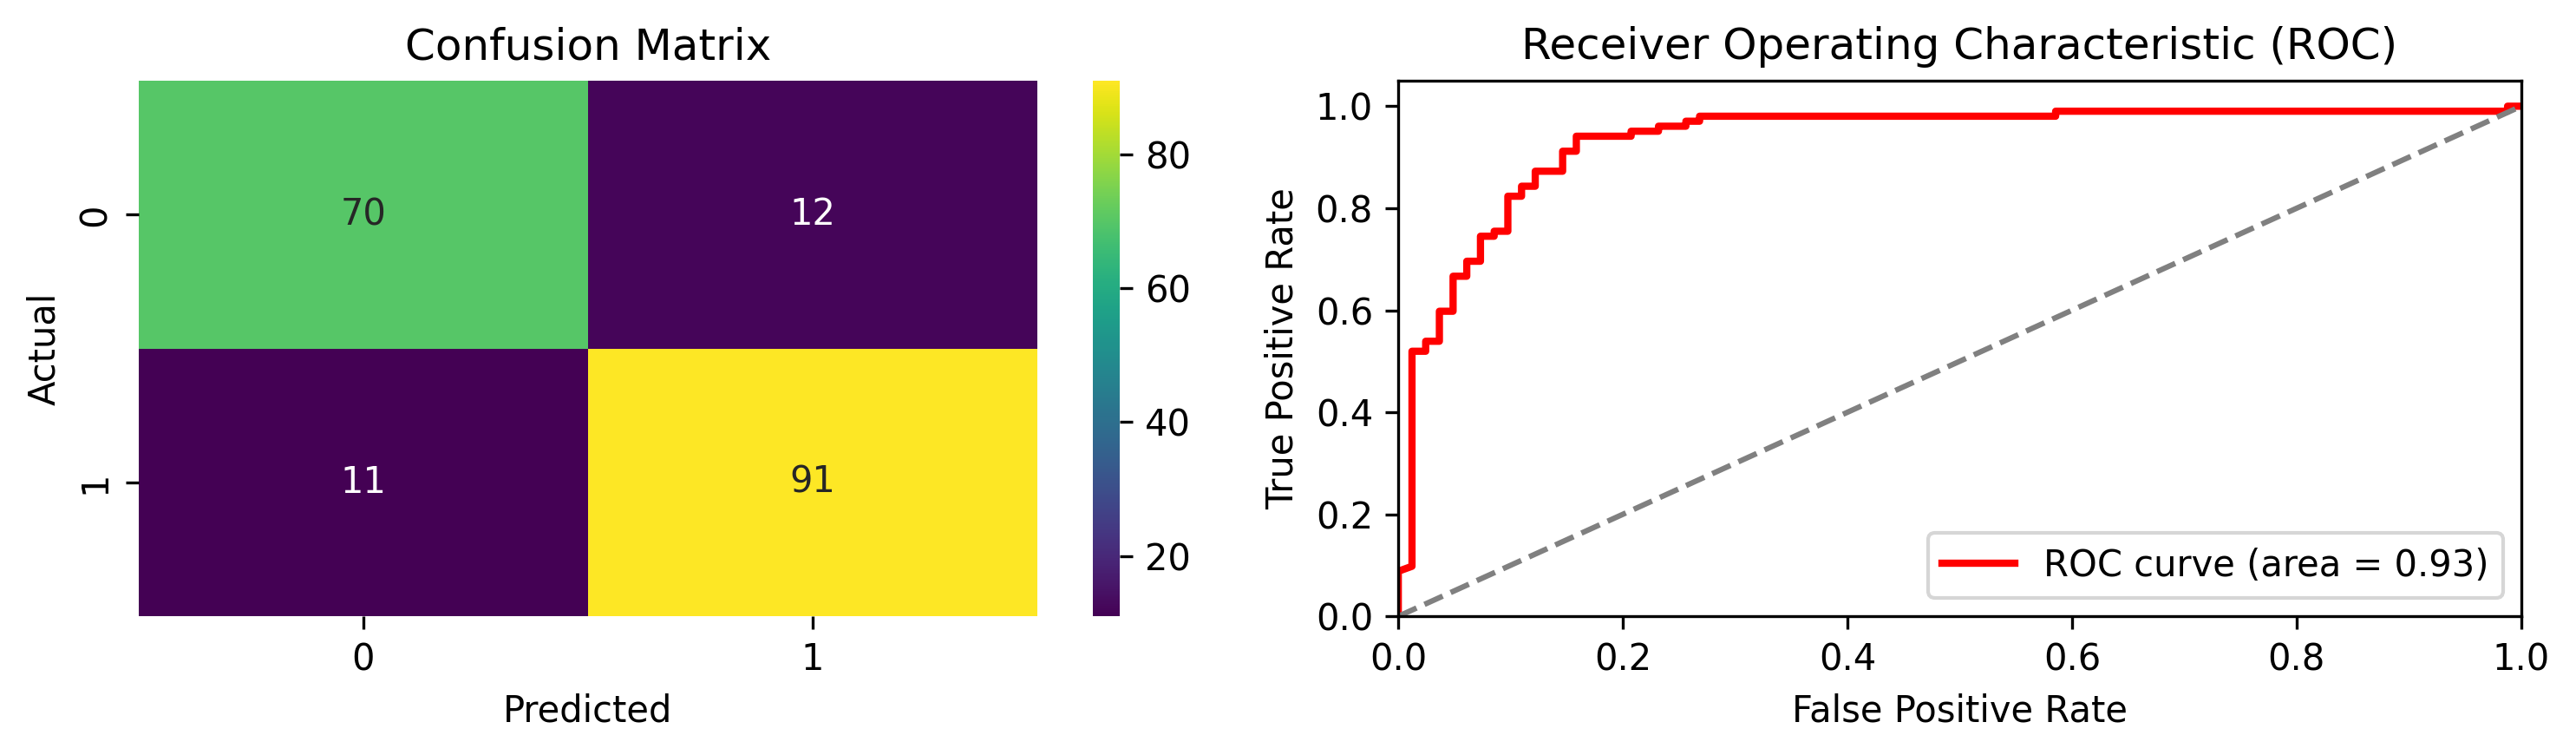

In [101]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_XGB_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_XGB_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_XGB.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**5. Gradient Boosting Classification**

In [102]:
model_GB = GradientBoostingClassifier()

In [103]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_GB, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.97342193 0.93103448 0.91417683 0.92997543 0.90812424]
Mean ROC-AUC Score: 0.93
Standard Deviation of ROC-AUC Scores: 0.02


              precision    recall  f1-score   support

           0       0.84      0.88      0.86        82
           1       0.90      0.86      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



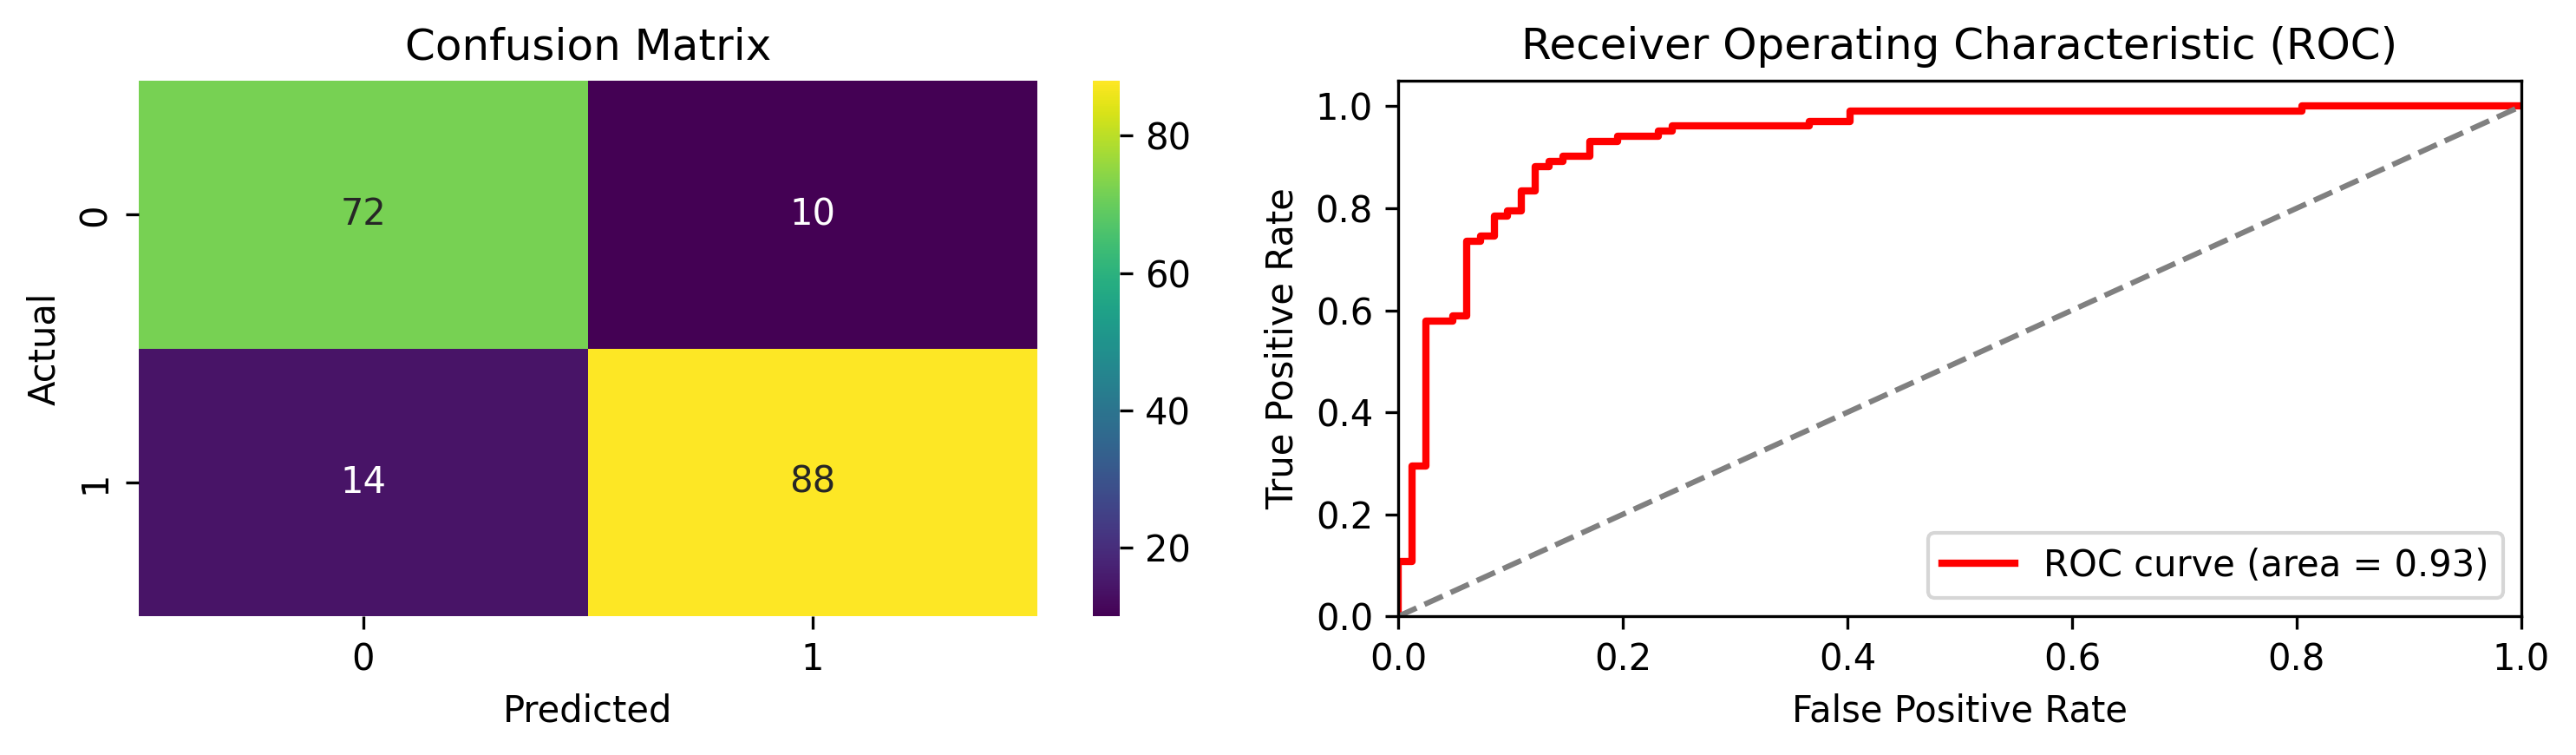

In [104]:
# Fit the model and predict
model_GB.fit(X_train_resampled, y_train_resampled)
y_pred_GB = model_GB.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_GB))
conf_matrix = confusion_matrix(y_test, y_pred_GB)

# Predict probabilities and compute ROC-AUC
y_prob = model_GB.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [105]:
# hyper parameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],                
    'learning_rate': [0.01, 0.1, 0.2],             
    'max_depth': [3, 5, 7, 10],                   
    'subsample': [0.8, 0.9, 1.0],                  
    'min_samples_split': [2, 5, 10],               
    'min_samples_leaf': [1, 2, 4]        
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_GB,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_GB = grid_search.best_estimator_
best_model_GB.fit(X_train_resampled, y_train_resampled)
y_pred_GB_tuned = best_model_GB.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Score: 0.94


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



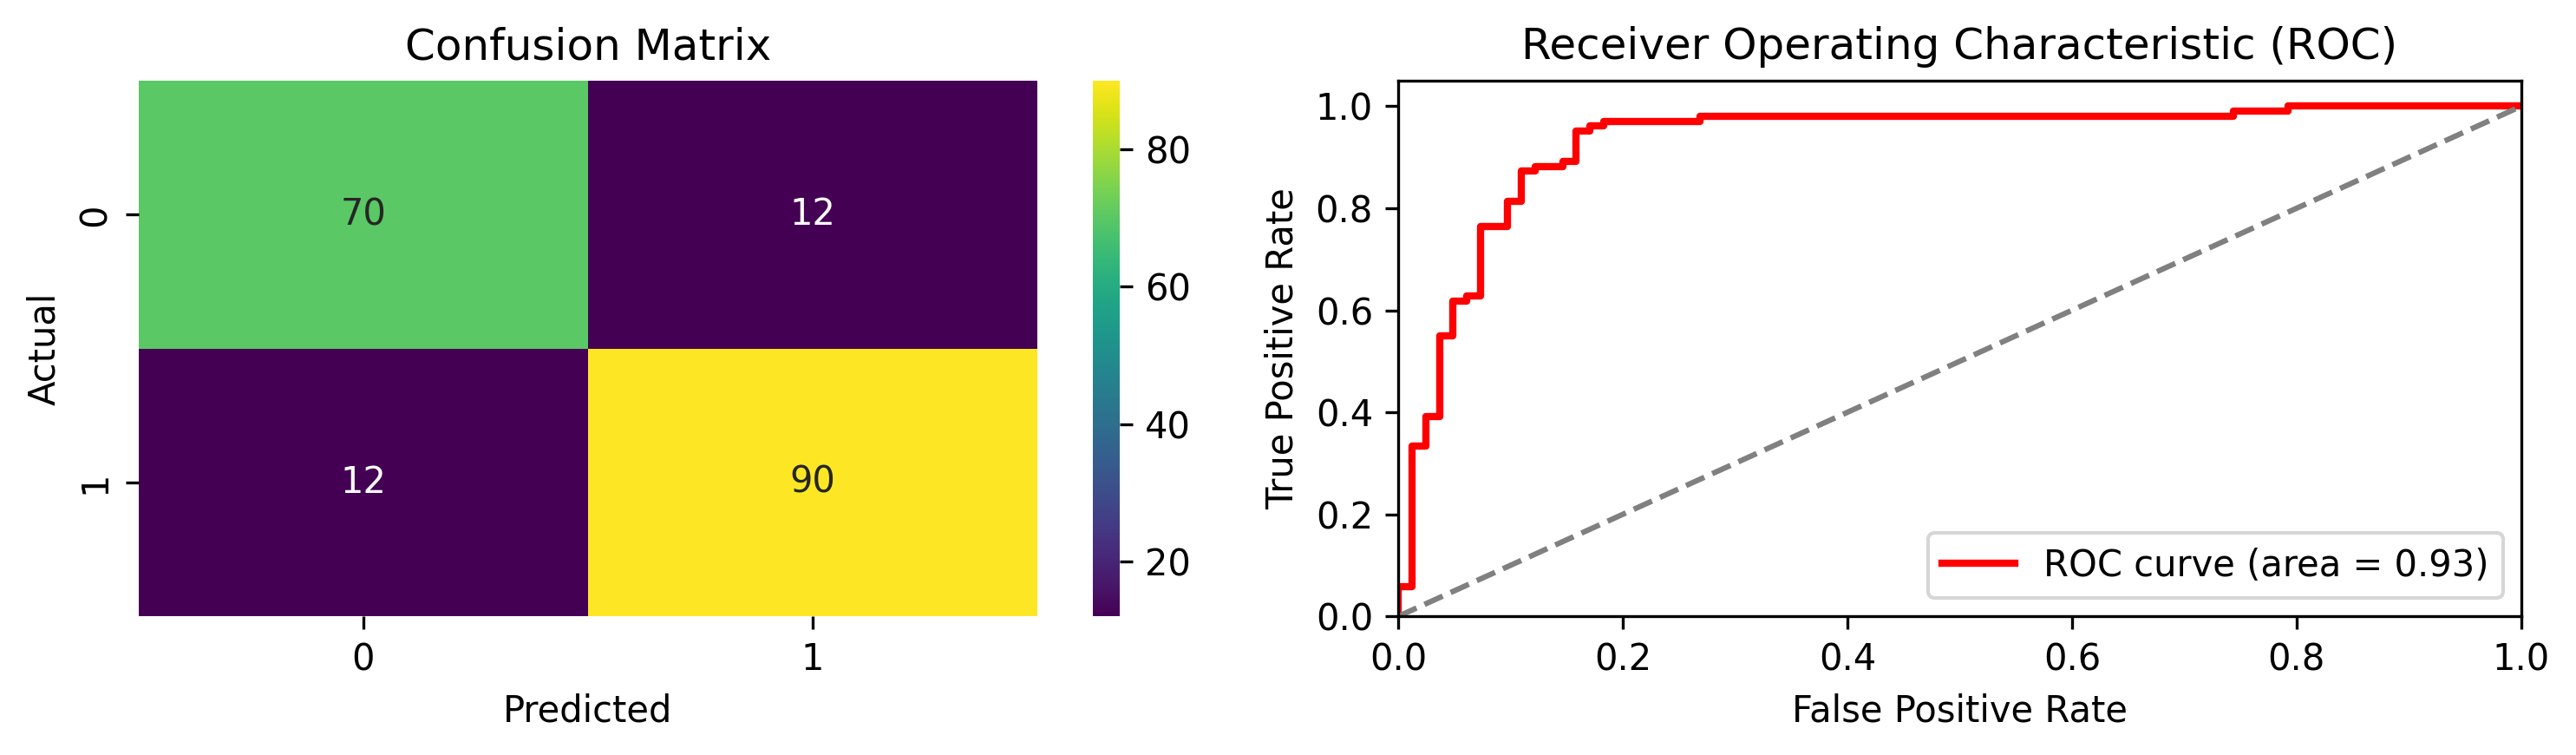

In [106]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_GB_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_GB_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_GB.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**6. ANN Classification**

In [107]:
model_ANN = MLPClassifier()

In [108]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_ANN, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.97478103 0.92226255 0.88932927 0.93703931 0.90529376]
Mean ROC-AUC Score: 0.93
Standard Deviation of ROC-AUC Scores: 0.03


              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



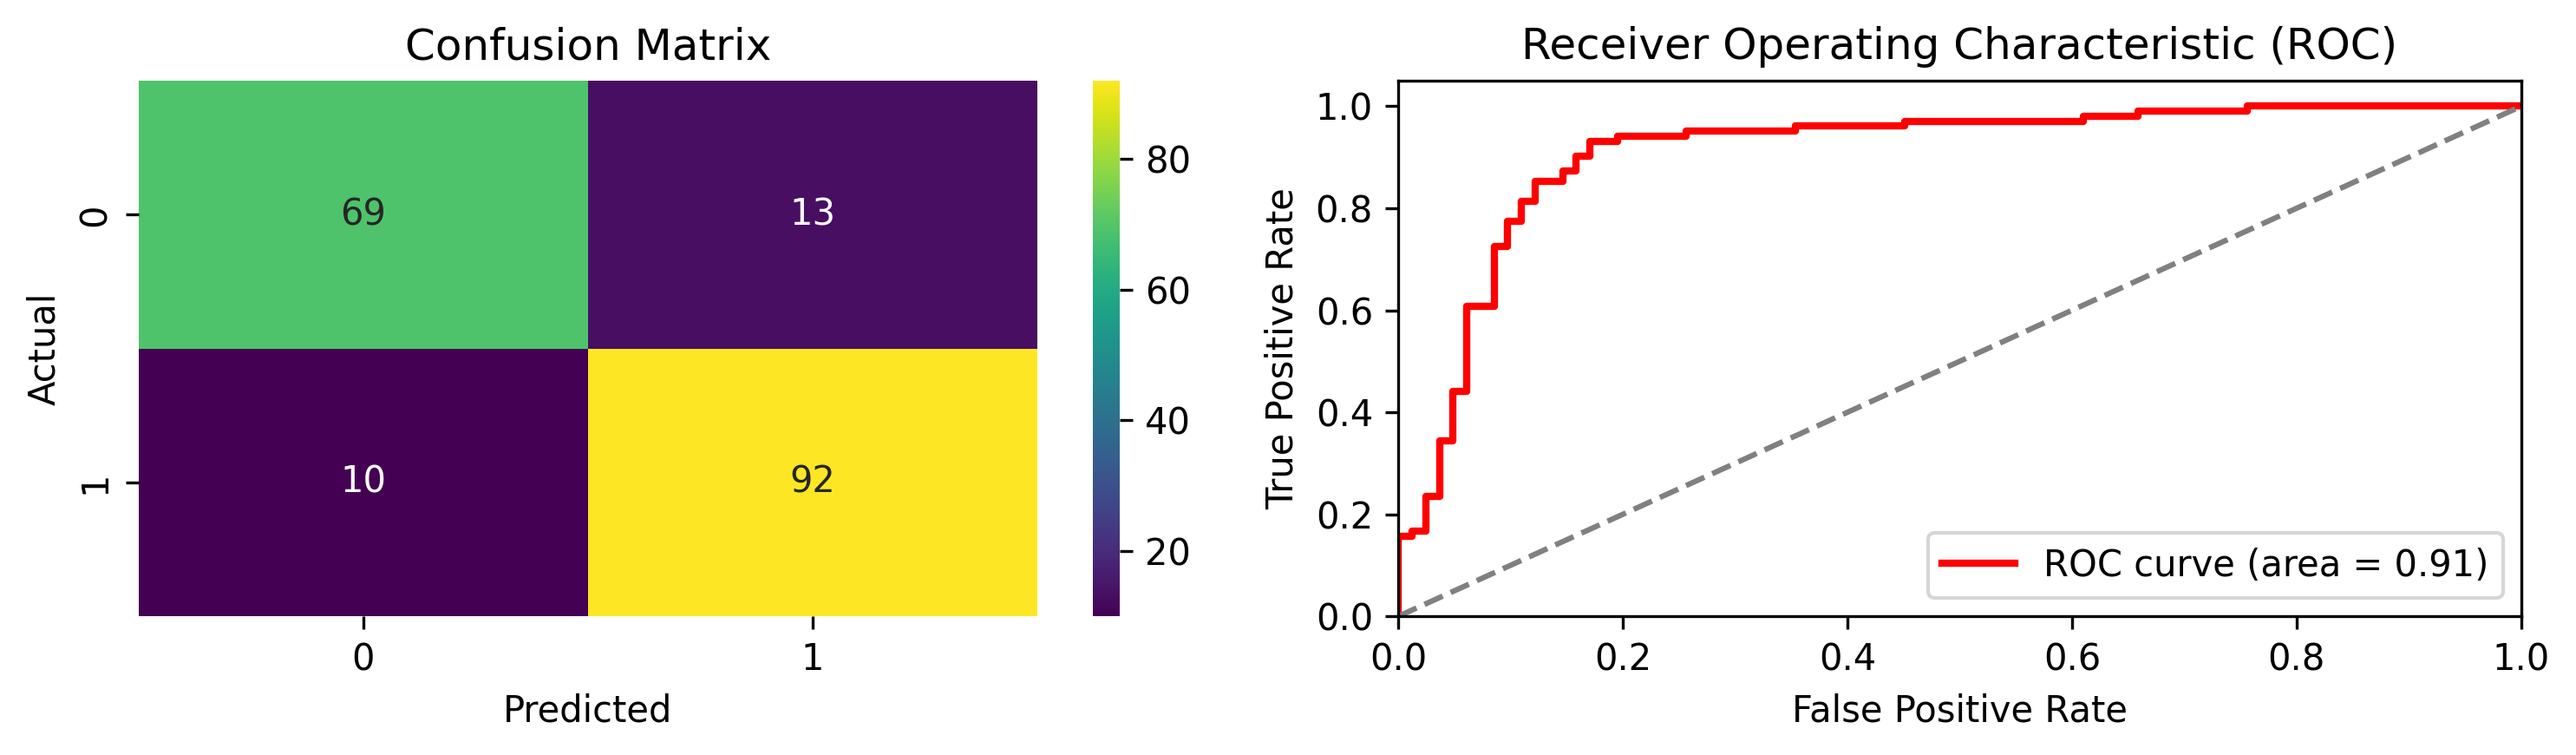

In [109]:
# Fit the model and predict
model_ANN.fit(X_train_resampled, y_train_resampled)
y_pred_ANN = model_ANN.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_ANN))
conf_matrix = confusion_matrix(y_test, y_pred_ANN)

# Predict probabilities and compute ROC-AUC
y_prob = model_ANN.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [110]:
# hyper parameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 
    'activation': ['relu', 'tanh', 'logistic'],                  
    'solver': ['adam', 'sgd', 'lbfgs'],                         
    'alpha': [0.0001, 0.001, 0.01, 0.1],                        
    'learning_rate': ['constant', 'invscaling', 'adaptive']     
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_ANN,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_ANN = grid_search.best_estimator_
best_model_ANN.fit(X_train_resampled, y_train_resampled)
y_pred_ANN_tuned = best_model_ANN.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'invscaling', 'solver': 'adam'}
Best Cross-Validation Score: 0.94


              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



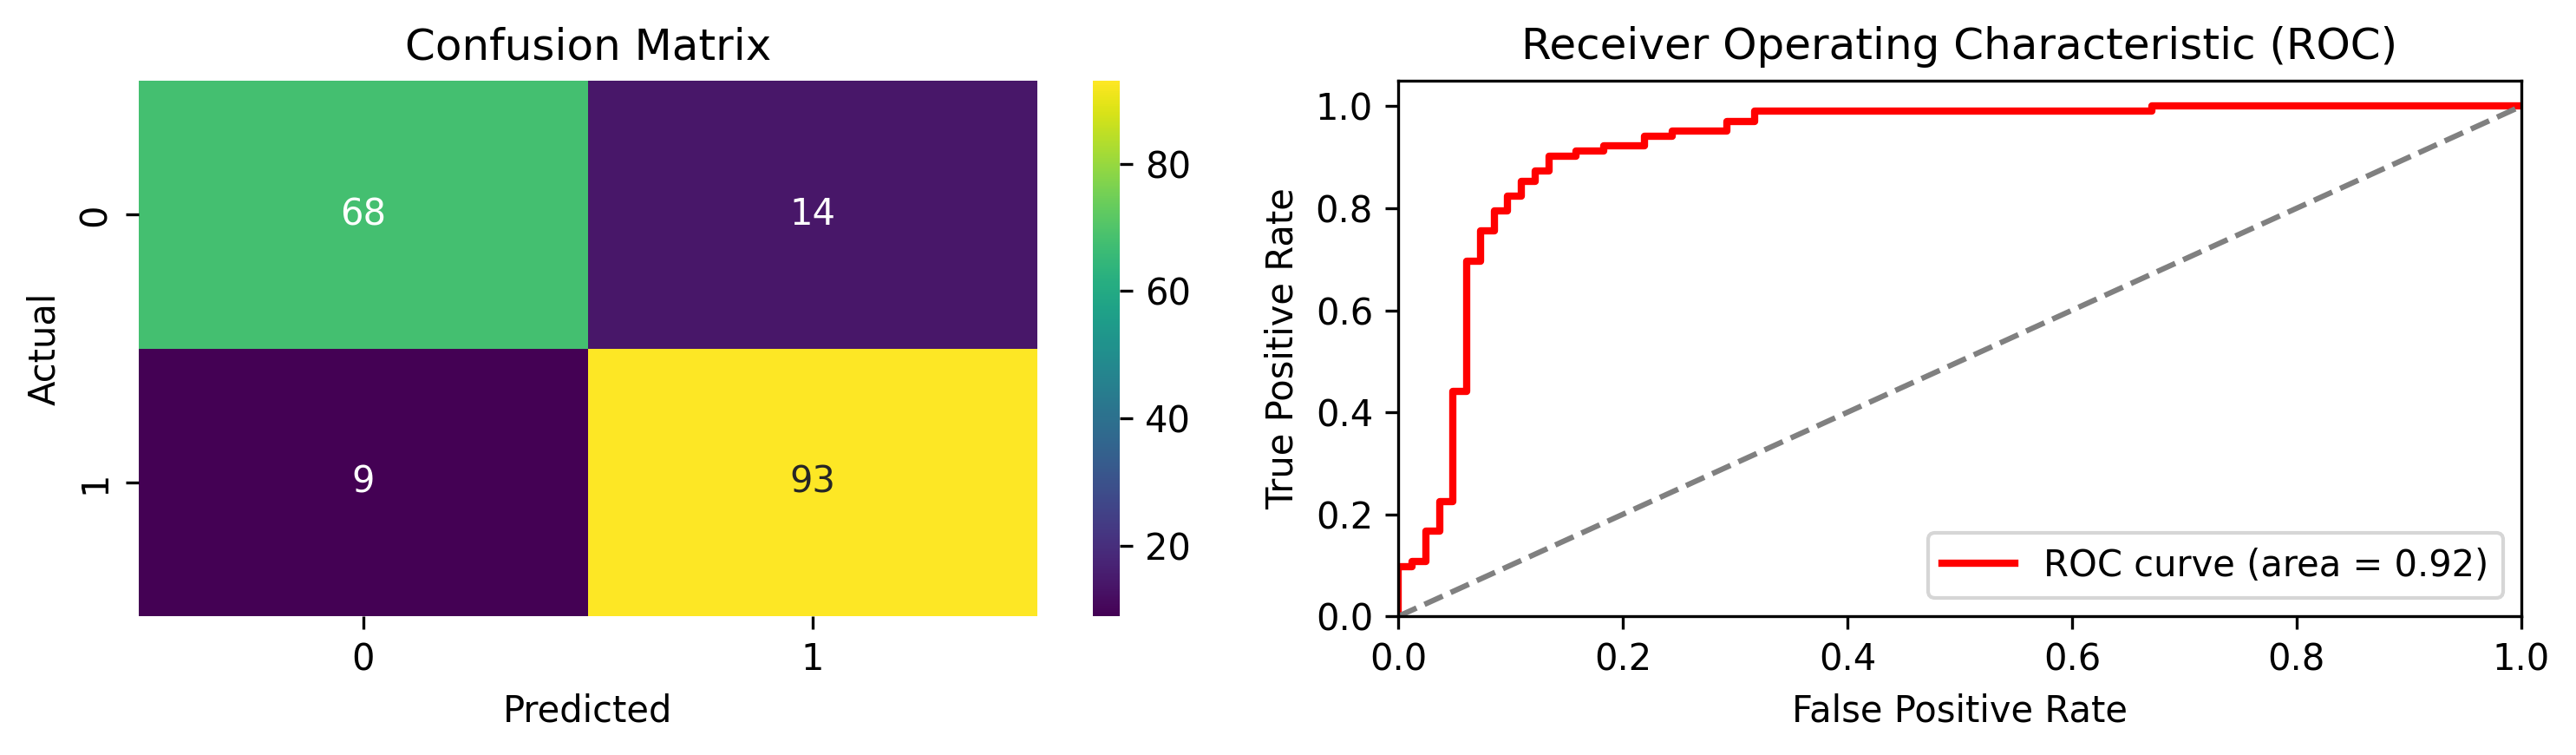

In [111]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_ANN_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_ANN_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_ANN.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**7. K-Nearest Neighbors Classification**

In [112]:
model_KNN = KNeighborsClassifier()

In [113]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_KNN, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.94571127 0.88664549 0.88368902 0.91346744 0.88119645]
Mean ROC-AUC Score: 0.90
Standard Deviation of ROC-AUC Scores: 0.02


              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



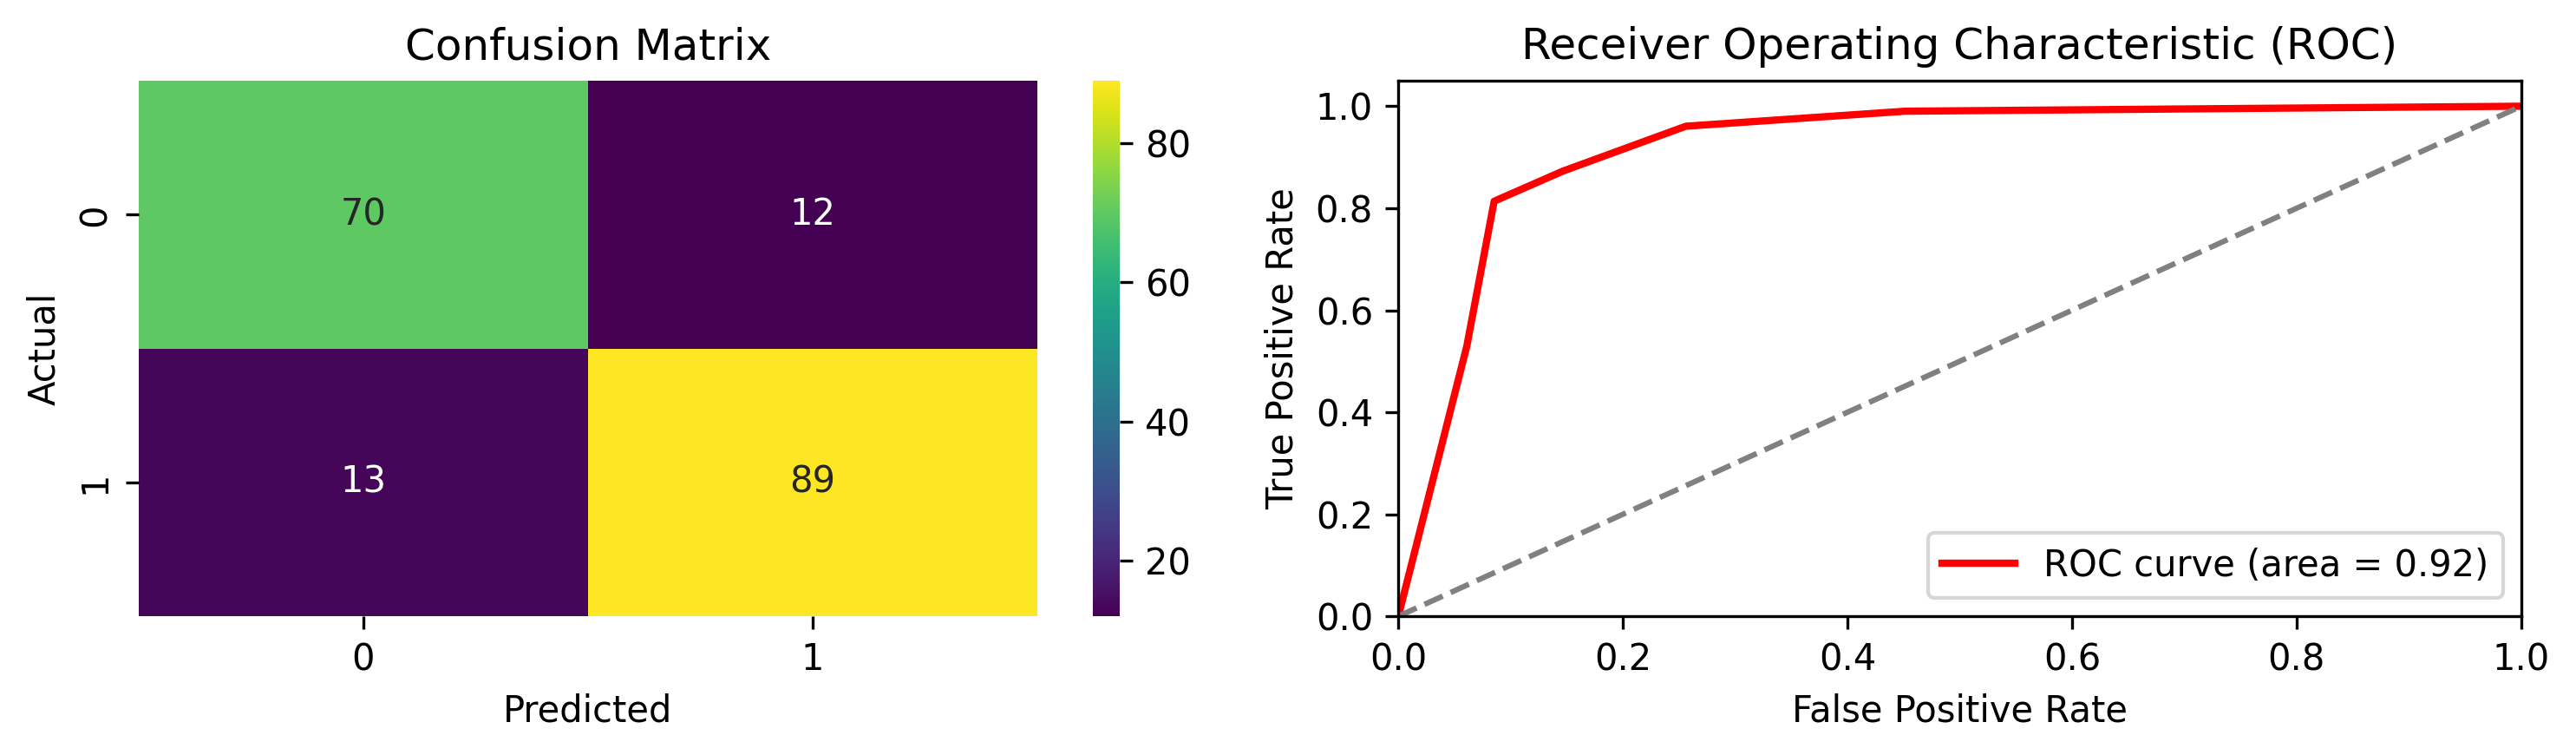

In [114]:
# Fit the model and predict
model_KNN.fit(X_train_resampled, y_train_resampled)
y_pred_KNN = model_KNN.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_KNN))
conf_matrix = confusion_matrix(y_test, y_pred_KNN)

# Predict probabilities and compute ROC-AUC
y_prob = model_KNN.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [115]:
# hyper parameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],         
    'weights': ['uniform', 'distance'],       
    'metric': ['euclidean', 'manhattan']    
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_KNN,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_KNN = grid_search.best_estimator_
best_model_KNN.fit(X_train_resampled, y_train_resampled)
y_pred_KNN_tuned = best_model_KNN.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-Validation Score: 0.94


              precision    recall  f1-score   support

           0       0.86      0.89      0.87        82
           1       0.91      0.88      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



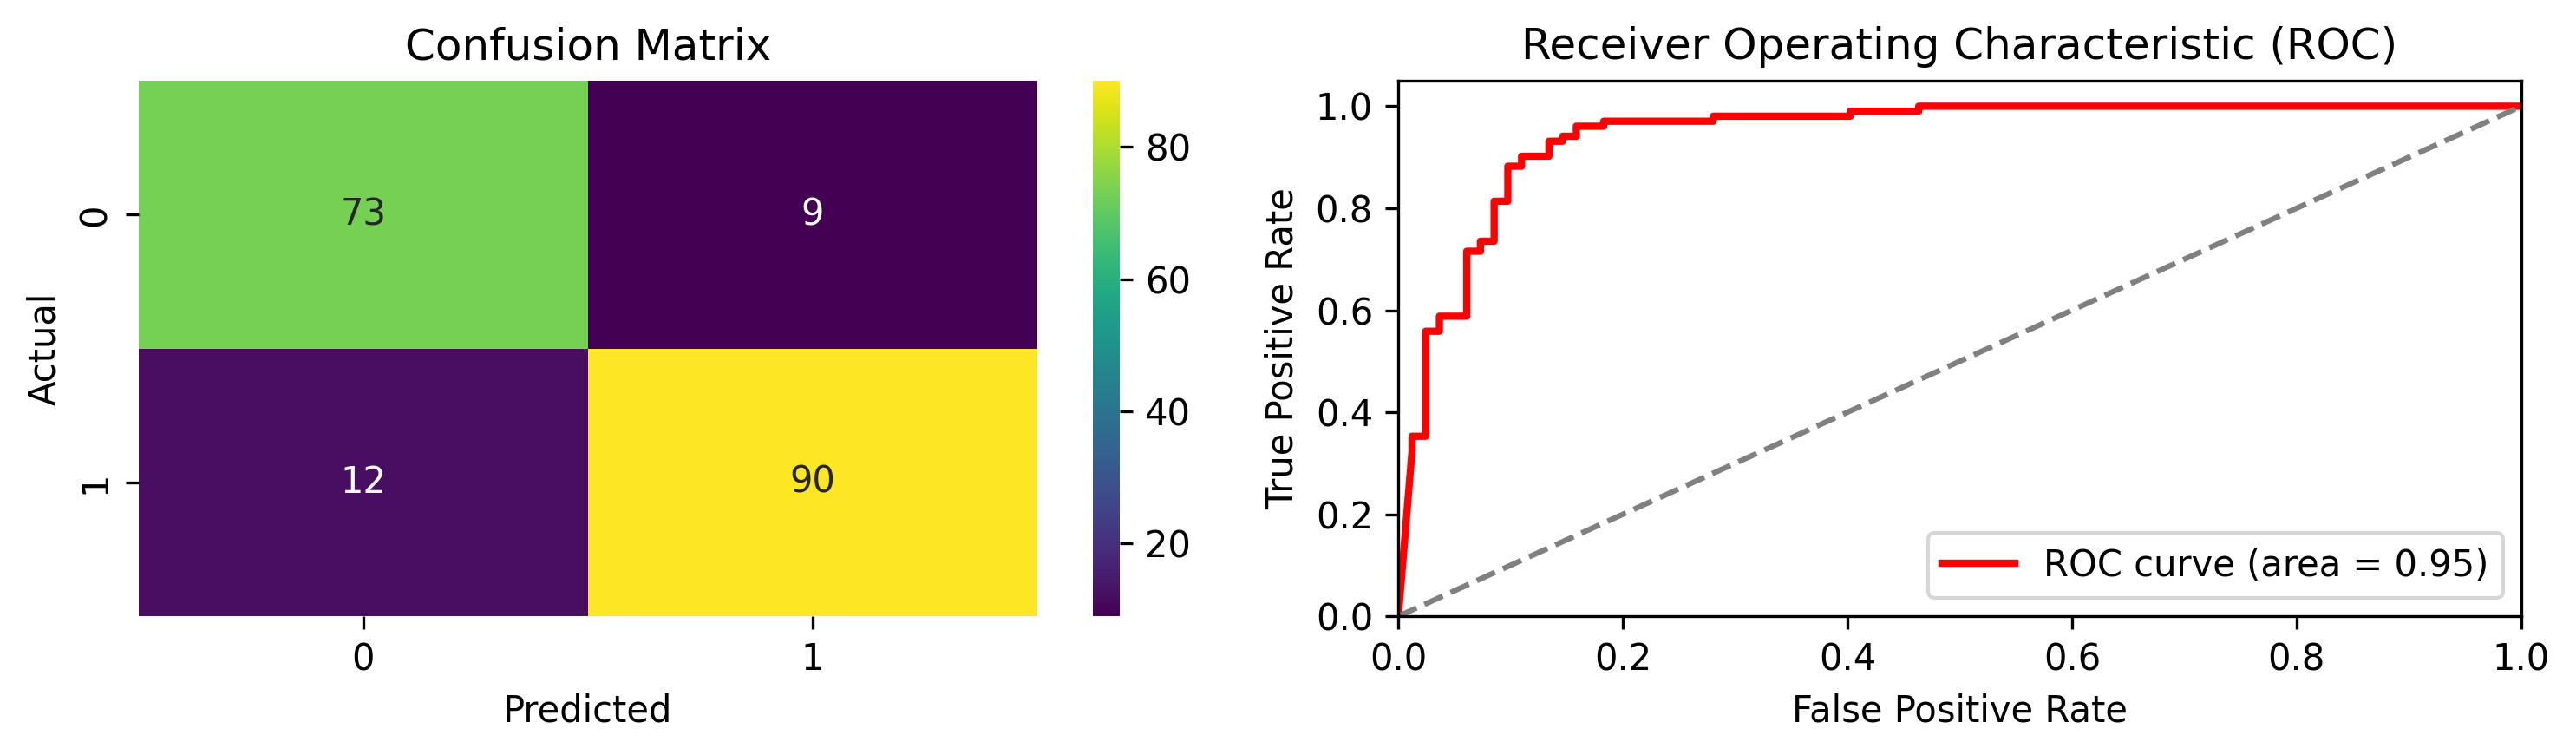

In [116]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_KNN_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_KNN_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_KNN.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**8. Support Vector Classification**

In [117]:
from sklearn.svm import SVC
model_SVM = SVC(probability=True)

In [118]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_SVM, X_train_resampled, y_train_resampled, cv=kf, scoring='roc_auc')

# Output the results
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of ROC-AUC Scores: {np.std(cv_scores):.2f}")

Cross-Validation ROC-AUC Scores: [0.96828753 0.91651543 0.91128049 0.91784398 0.91156671]
Mean ROC-AUC Score: 0.93
Standard Deviation of ROC-AUC Scores: 0.02


              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



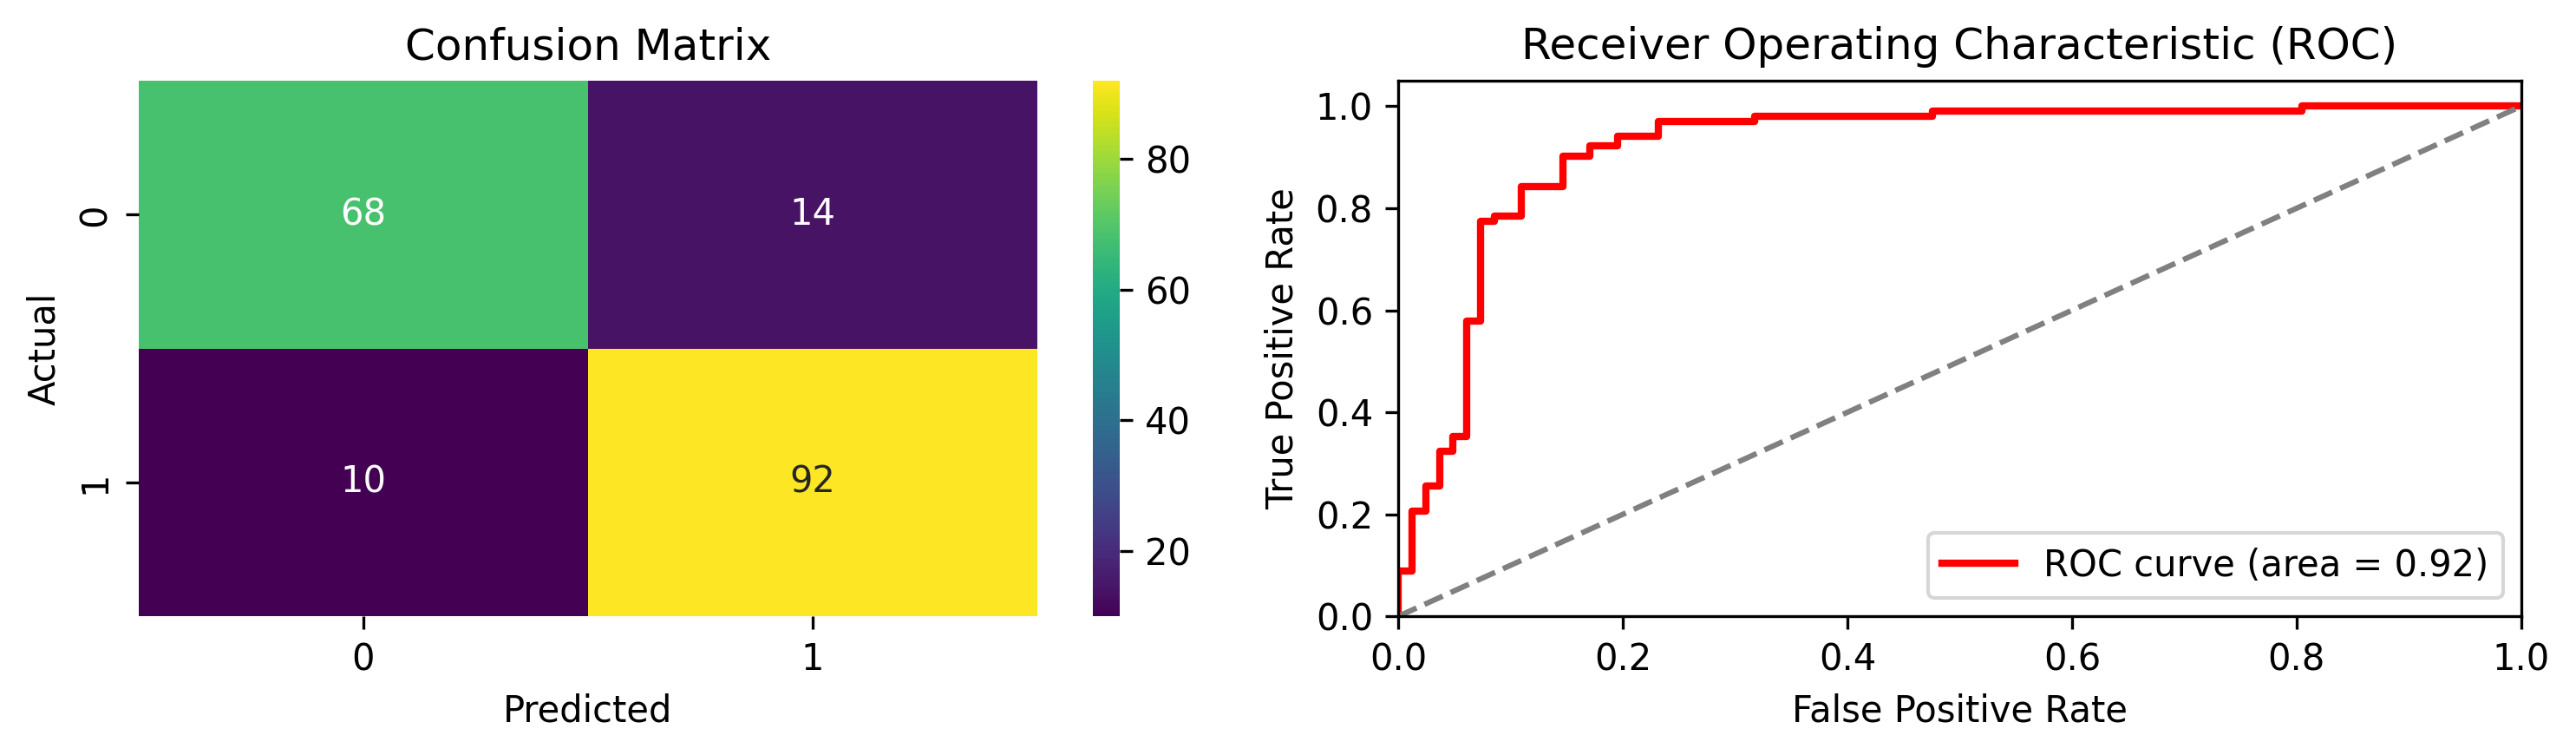

In [119]:
# Fit the model and predict
model_SVM.fit(X_train_resampled, y_train_resampled)
y_pred_SVM = model_SVM.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_SVM))
conf_matrix = confusion_matrix(y_test, y_pred_SVM)

# Predict probabilities and compute ROC-AUC
y_prob = model_SVM.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [120]:
# hyper parameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'gamma': ['scale', 'auto']  
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_SVM,  
    param_grid,
    cv=5,  
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best Parameters: {grid_search.best_params_}")

best_model_SVM = grid_search.best_estimator_
best_model_SVM.fit(X_train_resampled, y_train_resampled)
y_pred_SVM_tuned = best_model_SVM.predict(X_test)

print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.93


              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



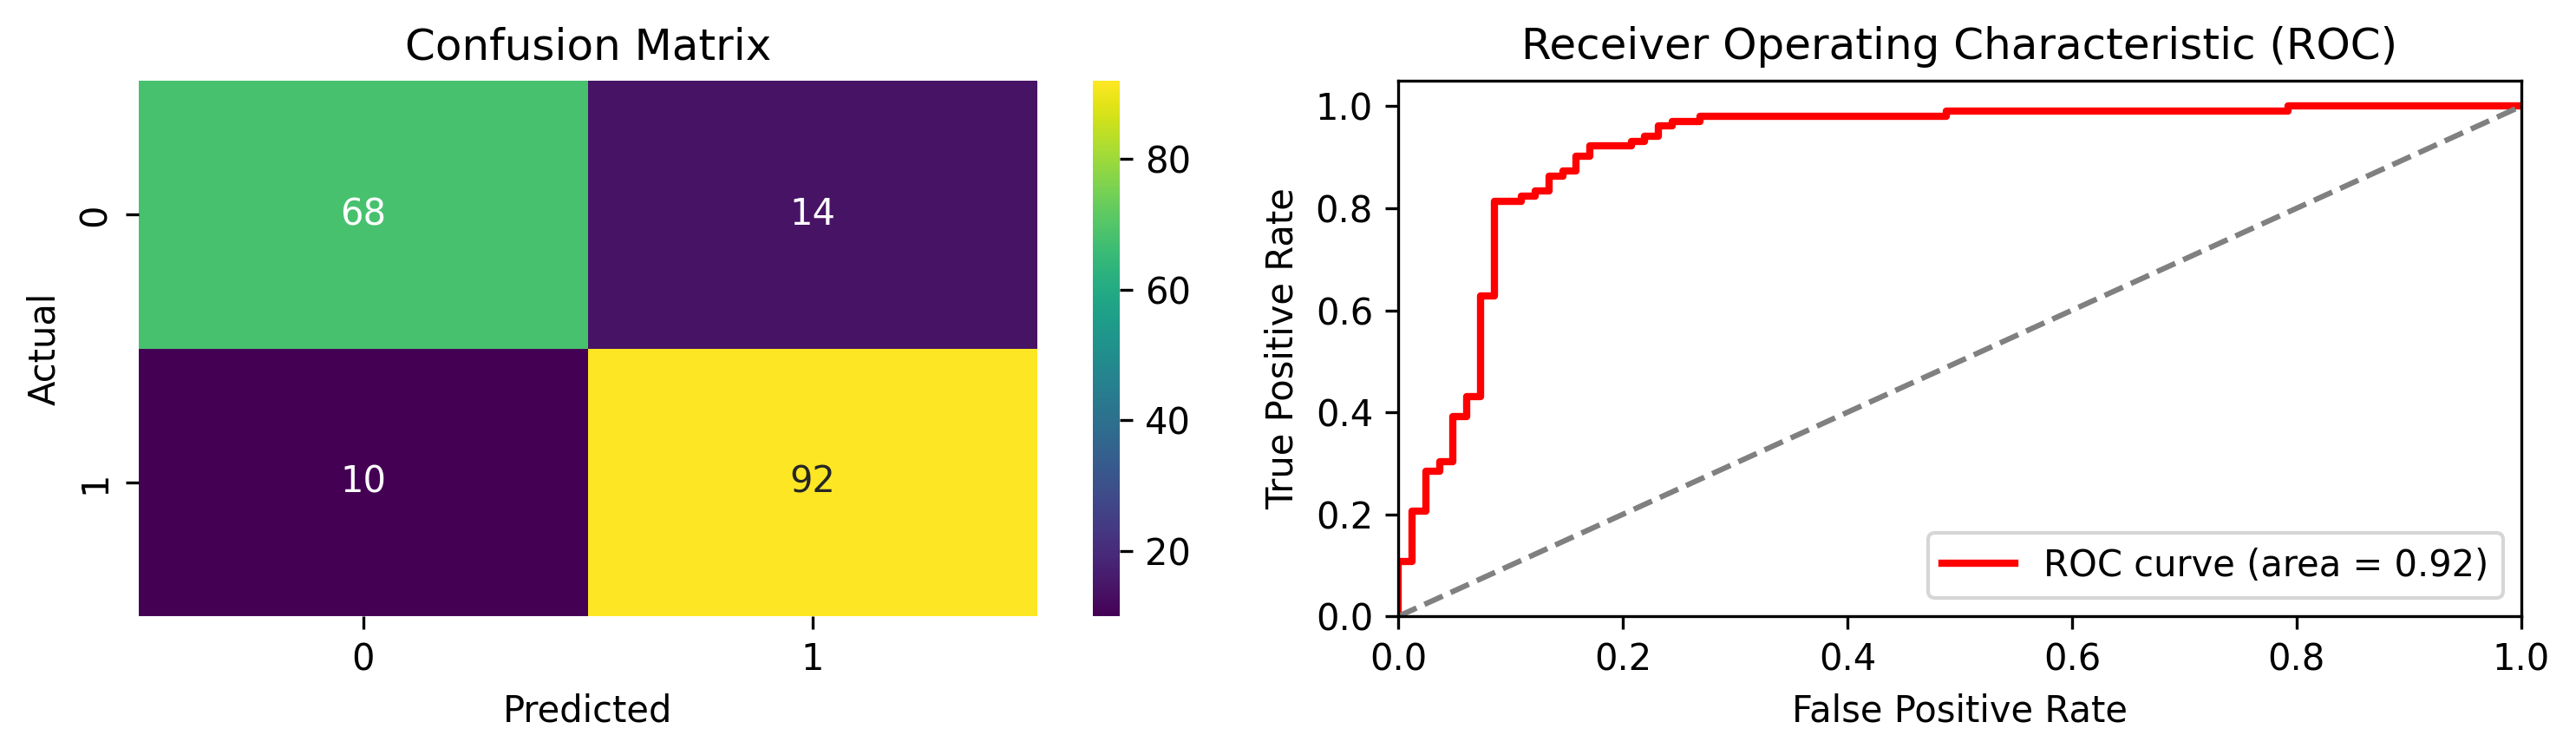

In [121]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_SVM_tuned))
conf_matrix = confusion_matrix(y_test, y_pred_SVM_tuned)

# Predict probabilities and compute ROC-AUC
y_prob = best_model_SVM.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**Inference:**

Based on the available performance metrics for each model, here are the insights:

1. **Top Performers:**
   - **Random Forest (RF):** Best overall with the highest accuracy (90%) and a high ROC-AUC score (0.93). It is a strong choice for balanced performance.
   - **K-Nearest Neighbors (KNN):** Outstanding ROC-AUC score (0.95) and high recall, making it particularly effective at identifying positive cases.

2. **Models with High ROC-AUC:**
   - **XGBoost (0.93) and Gradient Boosting (0.93):** Both models are strong in class discrimination, which is crucial for handling imbalanced datasets.

3. **Models to Consider:**
   - **ANN and SVM:** Provide solid performance but are not the best in accuracy or ROC-AUC.

4. **Model to Avoid:**
   - **Decision Tree (DT):** Shows the lowest accuracy and ROC-AUC score. It may not perform as well as other models for this dataset.

**Given the imbalanced nature of the heart attack dataset and the critical importance of accurately identifying patients at risk, K-Nearest Neighbors (KNN) emerges as the best model. Its superior ROC-AUC score and high recall ensure that the model is highly effective in detecting heart attack cases, which is crucial for providing timely and effective medical care.**